# Problem Defintion

    We want to analyze the historical data on electric vehicle charging sessions to understand the trends and patterns in power demand. Our goal is to forecast future power demand based on historical patterns and to identify the key factors that influence power demand

# Libraries

In [1]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import datetime as dt
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import statsmodels.api as sm
import warnings
import matplotlib.dates as mdates
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.feature_selection import VarianceThreshold



In [2]:
# FE / ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder, BinaryEncoder, CatBoostEncoder, HelmertEncoder, SumEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif,mutual_info_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

# Loading the Data

In [5]:
cwd = os.getcwd()
DATA_PATH = os.path.join(cwd, '..', 'data')
RAW_DATA_PATH = os.path.join(DATA_PATH, 'raw')
PROCESSED_DATA_PATH = os.path.join(DATA_PATH, 'processed')

In [4]:
def read_Data_16_17():
    data_path = os.path.join(RAW_DATA_PATH, "September_2016_August_2017.csv") #,parse_dates=[['Date', 'Hour']]) if date and hour to be merged here.
    data_raw = pd.read_csv(data_path)
    return data_raw
data_16_17 = read_Data_16_17()
data_16_17.head()

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2017-08-31T00:00:00,22:12,2017-08-31T00:00:00,23:11,18.27,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2017-08-31T00:00:00,22:01,2017-08-31T00:00:00,22:31,19.45,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,50575,2,2017-08-31T00:00:00,21:21,2017-08-31T00:00:00,21:59,19.71,"South Inch Car Park, Perth",APT Triple Rapid Charger
3,4,51516,2,2017-08-31T00:00:00,20:43,2017-08-31T00:00:00,21:03,9.84,Kinross Park and Ride,APT Triple Rapid Charger
4,5,50994,2,2017-08-31T00:00:00,19:50,2017-08-31T00:00:00,20:50,14.17,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger


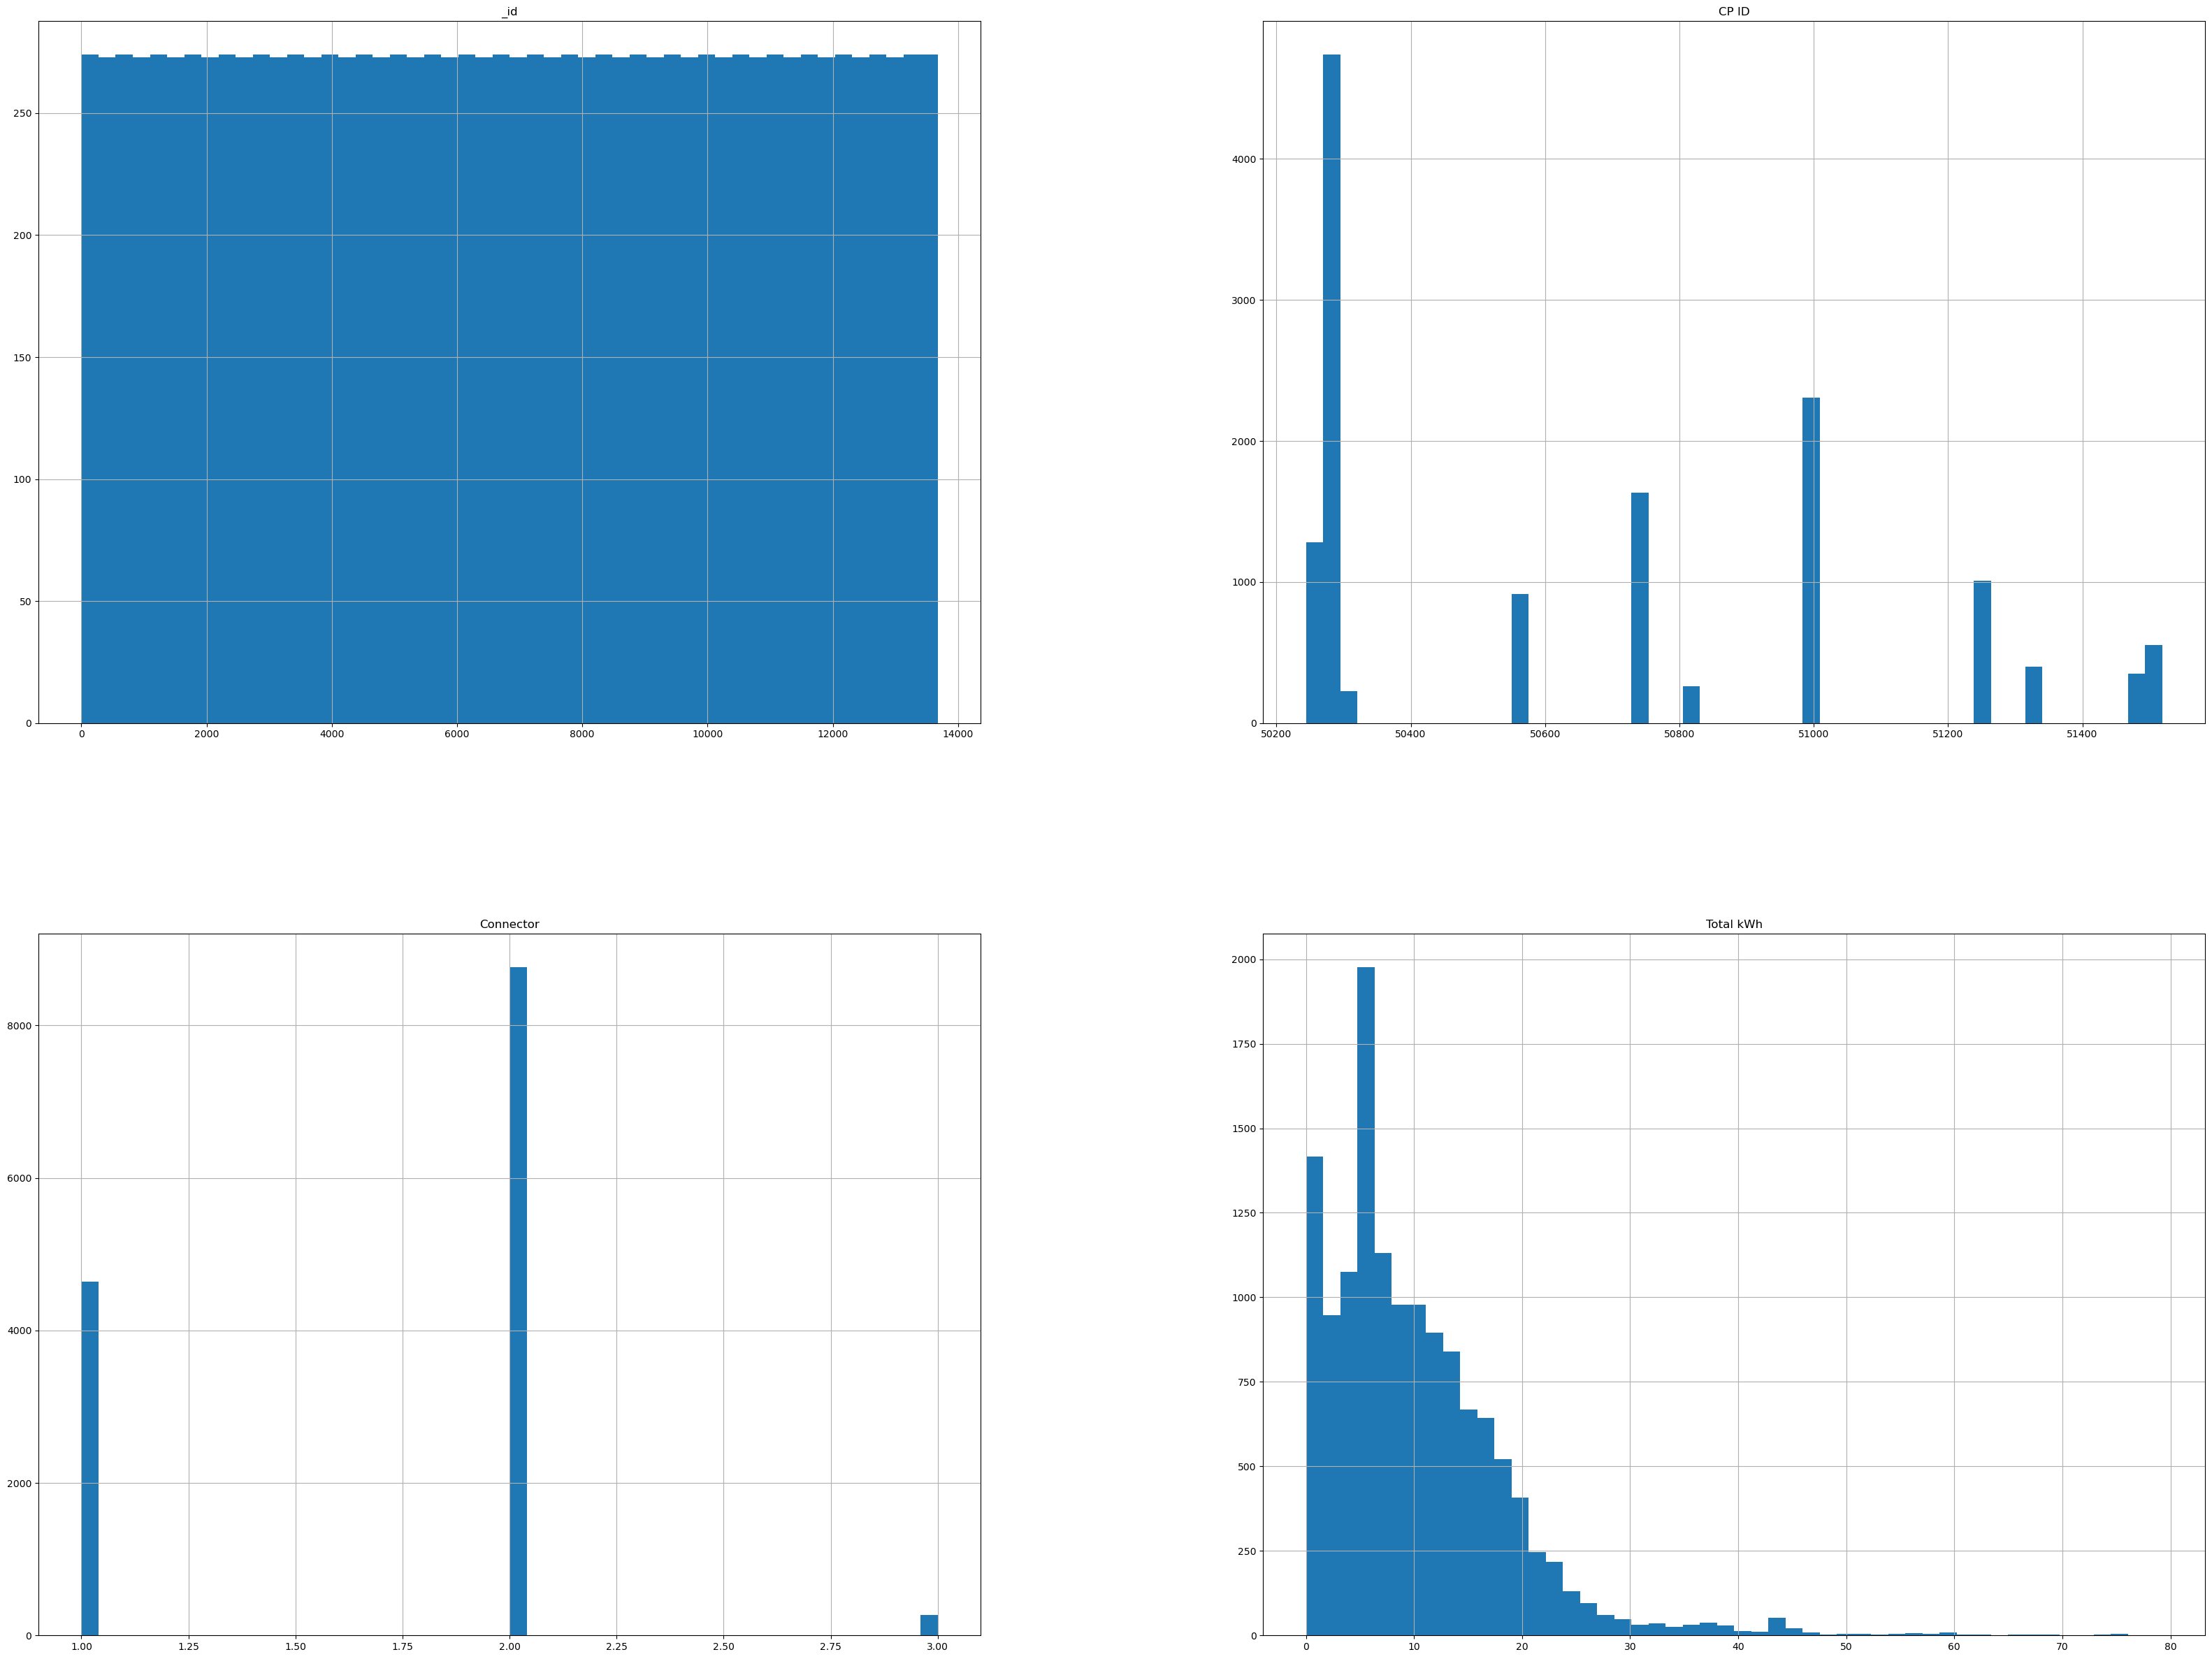

In [5]:
data_16_17.hist(bins=50, figsize=(40,30))
plt.show()

In [6]:
def read_Data_17_18():
    data_path = os.path.join(RAW_DATA_PATH, "September_2017_August_2018.csv") #,parse_dates=[['Date', 'Hour']]) if date and hour to be merged here.
    data_raw = pd.read_csv(data_path)
    return data_raw
data_17_18 = read_Data_17_18()
data_17_18.head()

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2018-08-31T00:00:00,22:48,2018-08-31T00:00:00,22:58,2.780,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2018-08-31T00:00:00,22:17,2018-08-31T00:00:00,22:29,1.330,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,51519,2,2018-08-31T00:00:00,22:09,2018-08-31T00:00:00,22:32,16.810,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
3,4,51250,1,2018-08-31T00:00:00,21:57,2018-08-31T00:00:00,22:16,5.390,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
4,5,50838,1,2018-08-31T00:00:00,21:01,2018-08-31T00:00:00,22:32,19.992,"Mill Street, Perth",APT 22kW Raption


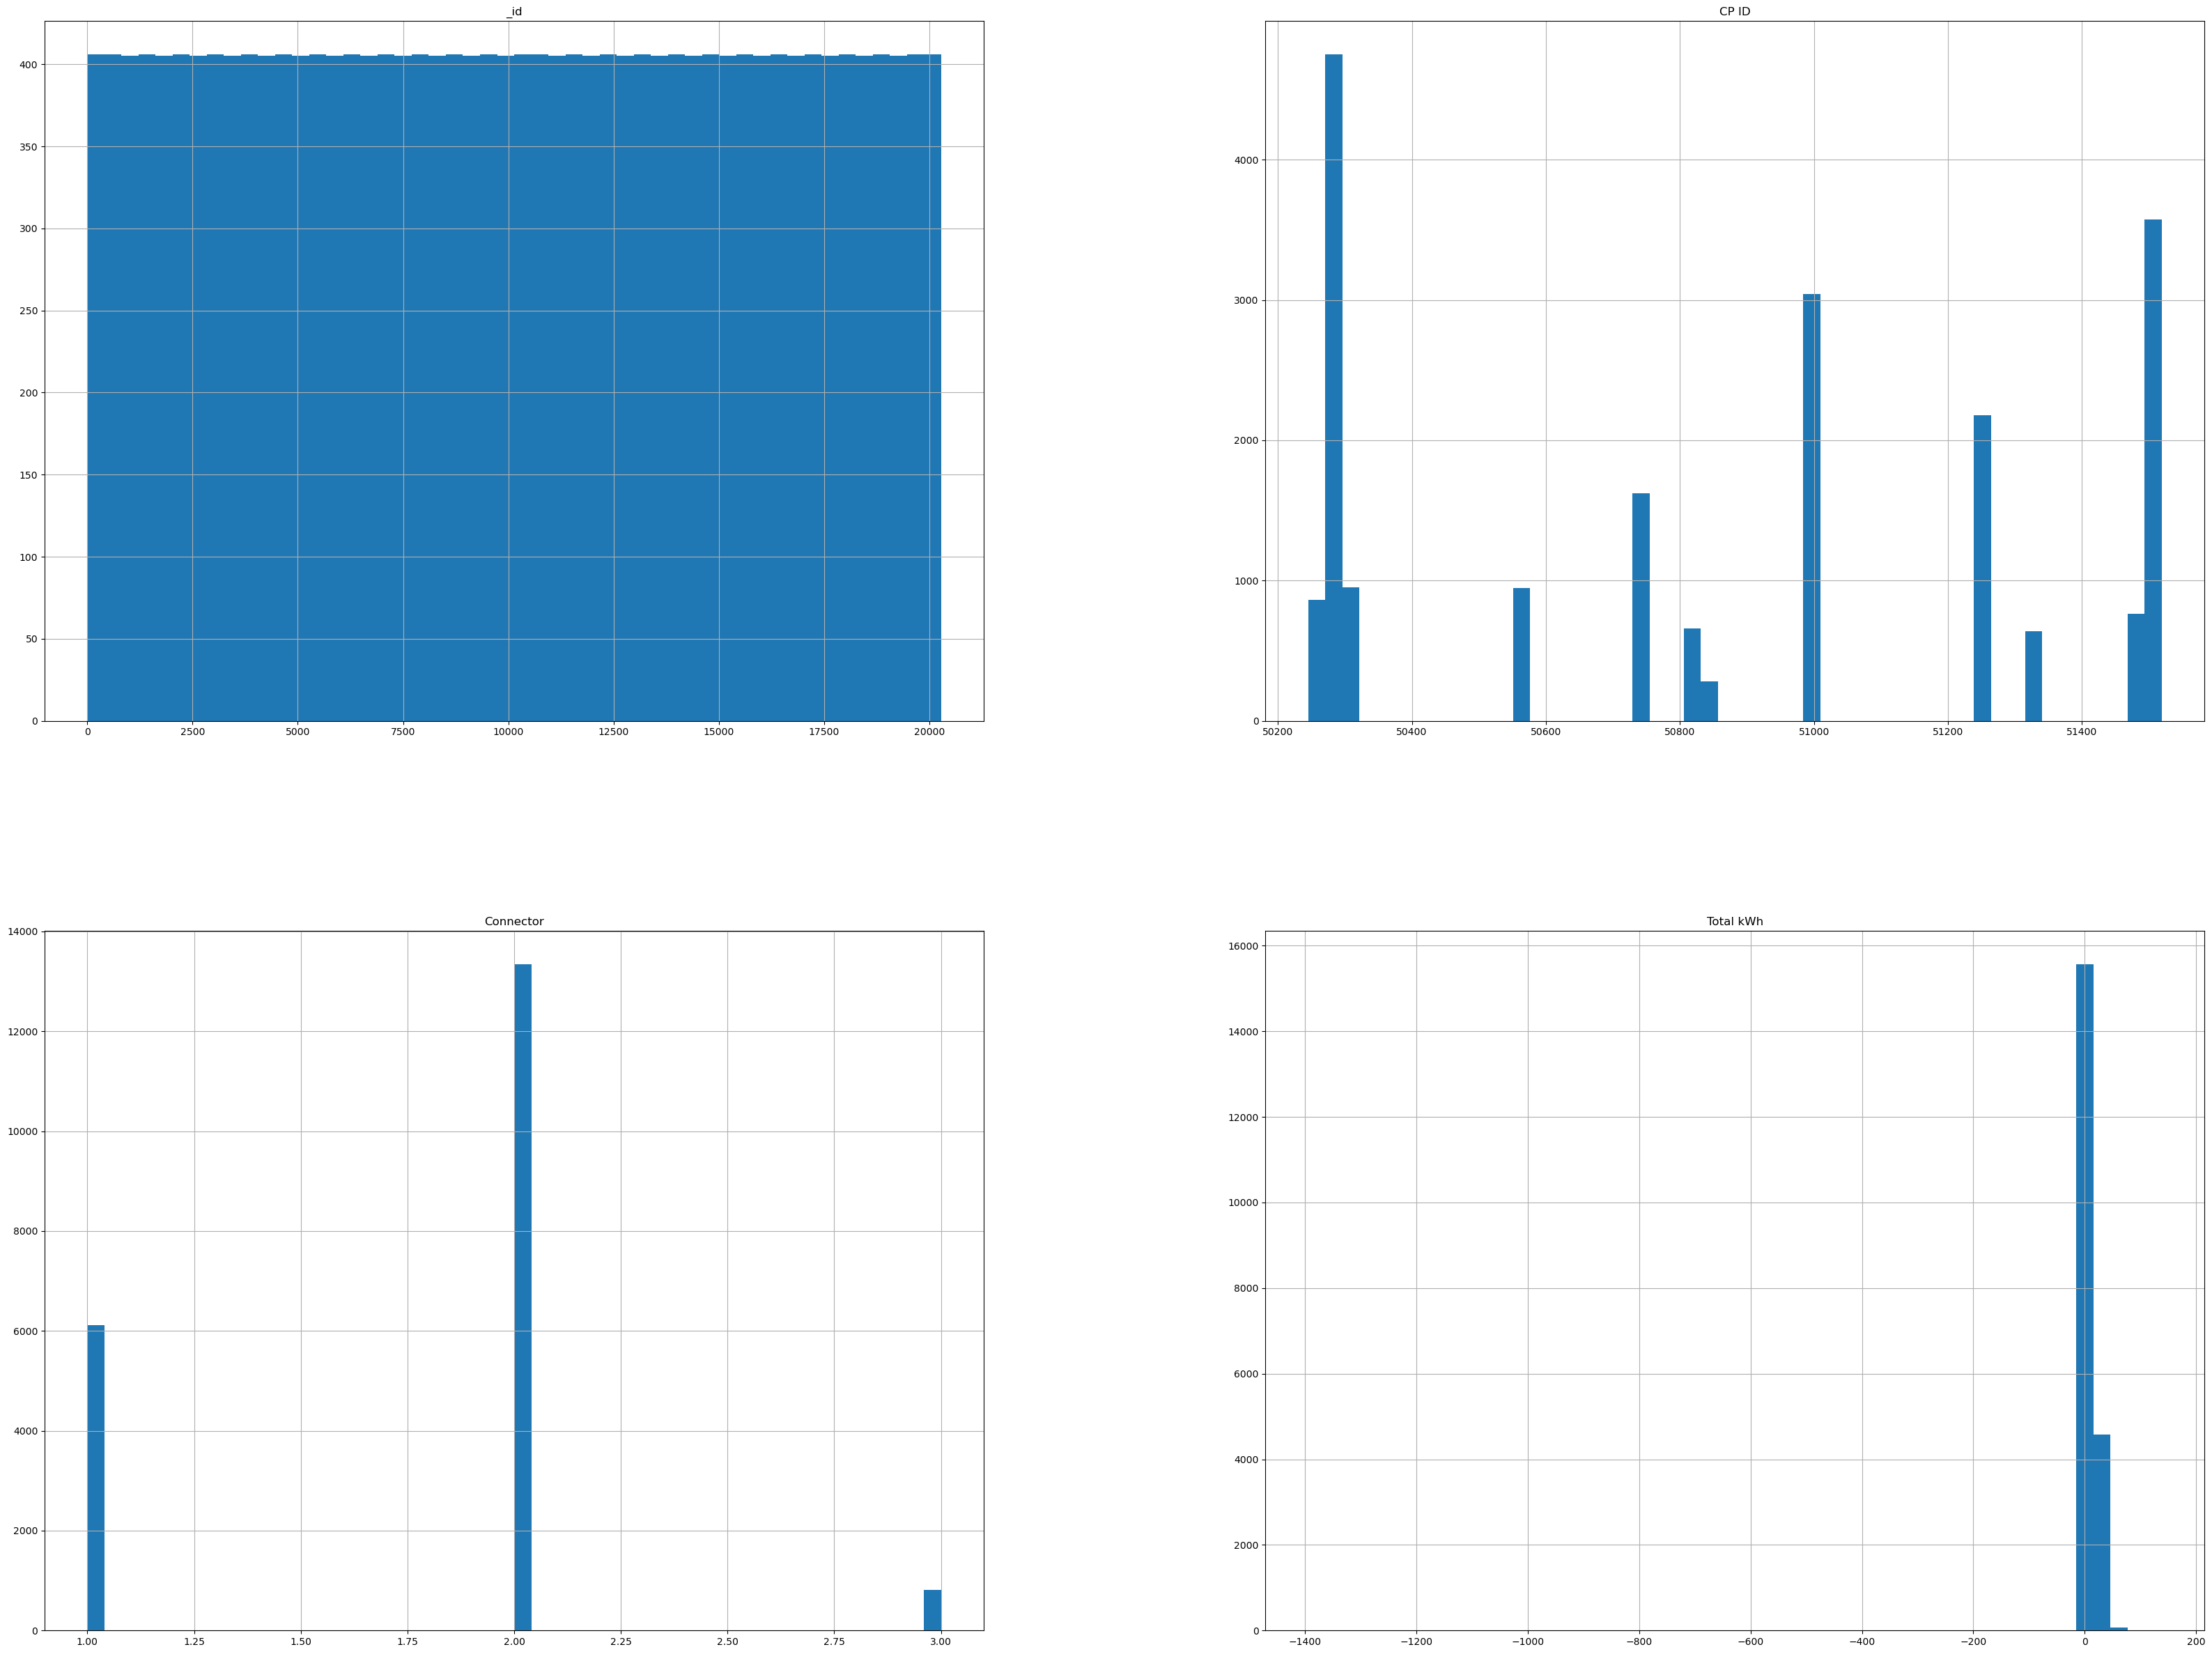

In [7]:
data_17_18.hist(bins=50, figsize=(40,30))
plt.show()

In [8]:
def read_Data_18_19():
    data_path = os.path.join(RAW_DATA_PATH, "September_2018_August_2019.csv") #,parse_dates=[['Date', 'Hour']]) if date and hour to be merged here.
    data_raw = pd.read_csv(data_path)
    return data_raw
data_18_19 = read_Data_18_19()
data_18_19.head()

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51516,2,2019-08-31T00:00:00,23:26,2019-08-31T00:00:00,23:54,12.780,"Kinross Park and Ride, Kinross",APT Triple Rapid Charger
1,2,51249,1,2019-08-31T00:00:00,21:12,2019-08-31T00:00:00,21:32,5.700,"Atholl Street Car Park, Dunkeld",Siemens Triple Rapid Charger
2,3,50995,2,2019-08-31T00:00:00,20:26,2019-08-31T00:00:00,21:20,27.680,"Moness Terrace Car Park, Aberfeldy",APT Triple Rapid Charger
3,4,50839,1,2019-08-31T00:00:00,20:06,2019-08-31T00:00:00,23:03,17.526,"Mill Street, Perth",APT 22kW Raption
4,5,50745,2,2019-08-31T00:00:00,19:43,2019-08-31T00:00:00,20:23,12.930,"Kinross Park and Ride, Kinross",APT Triple Rapid Charger


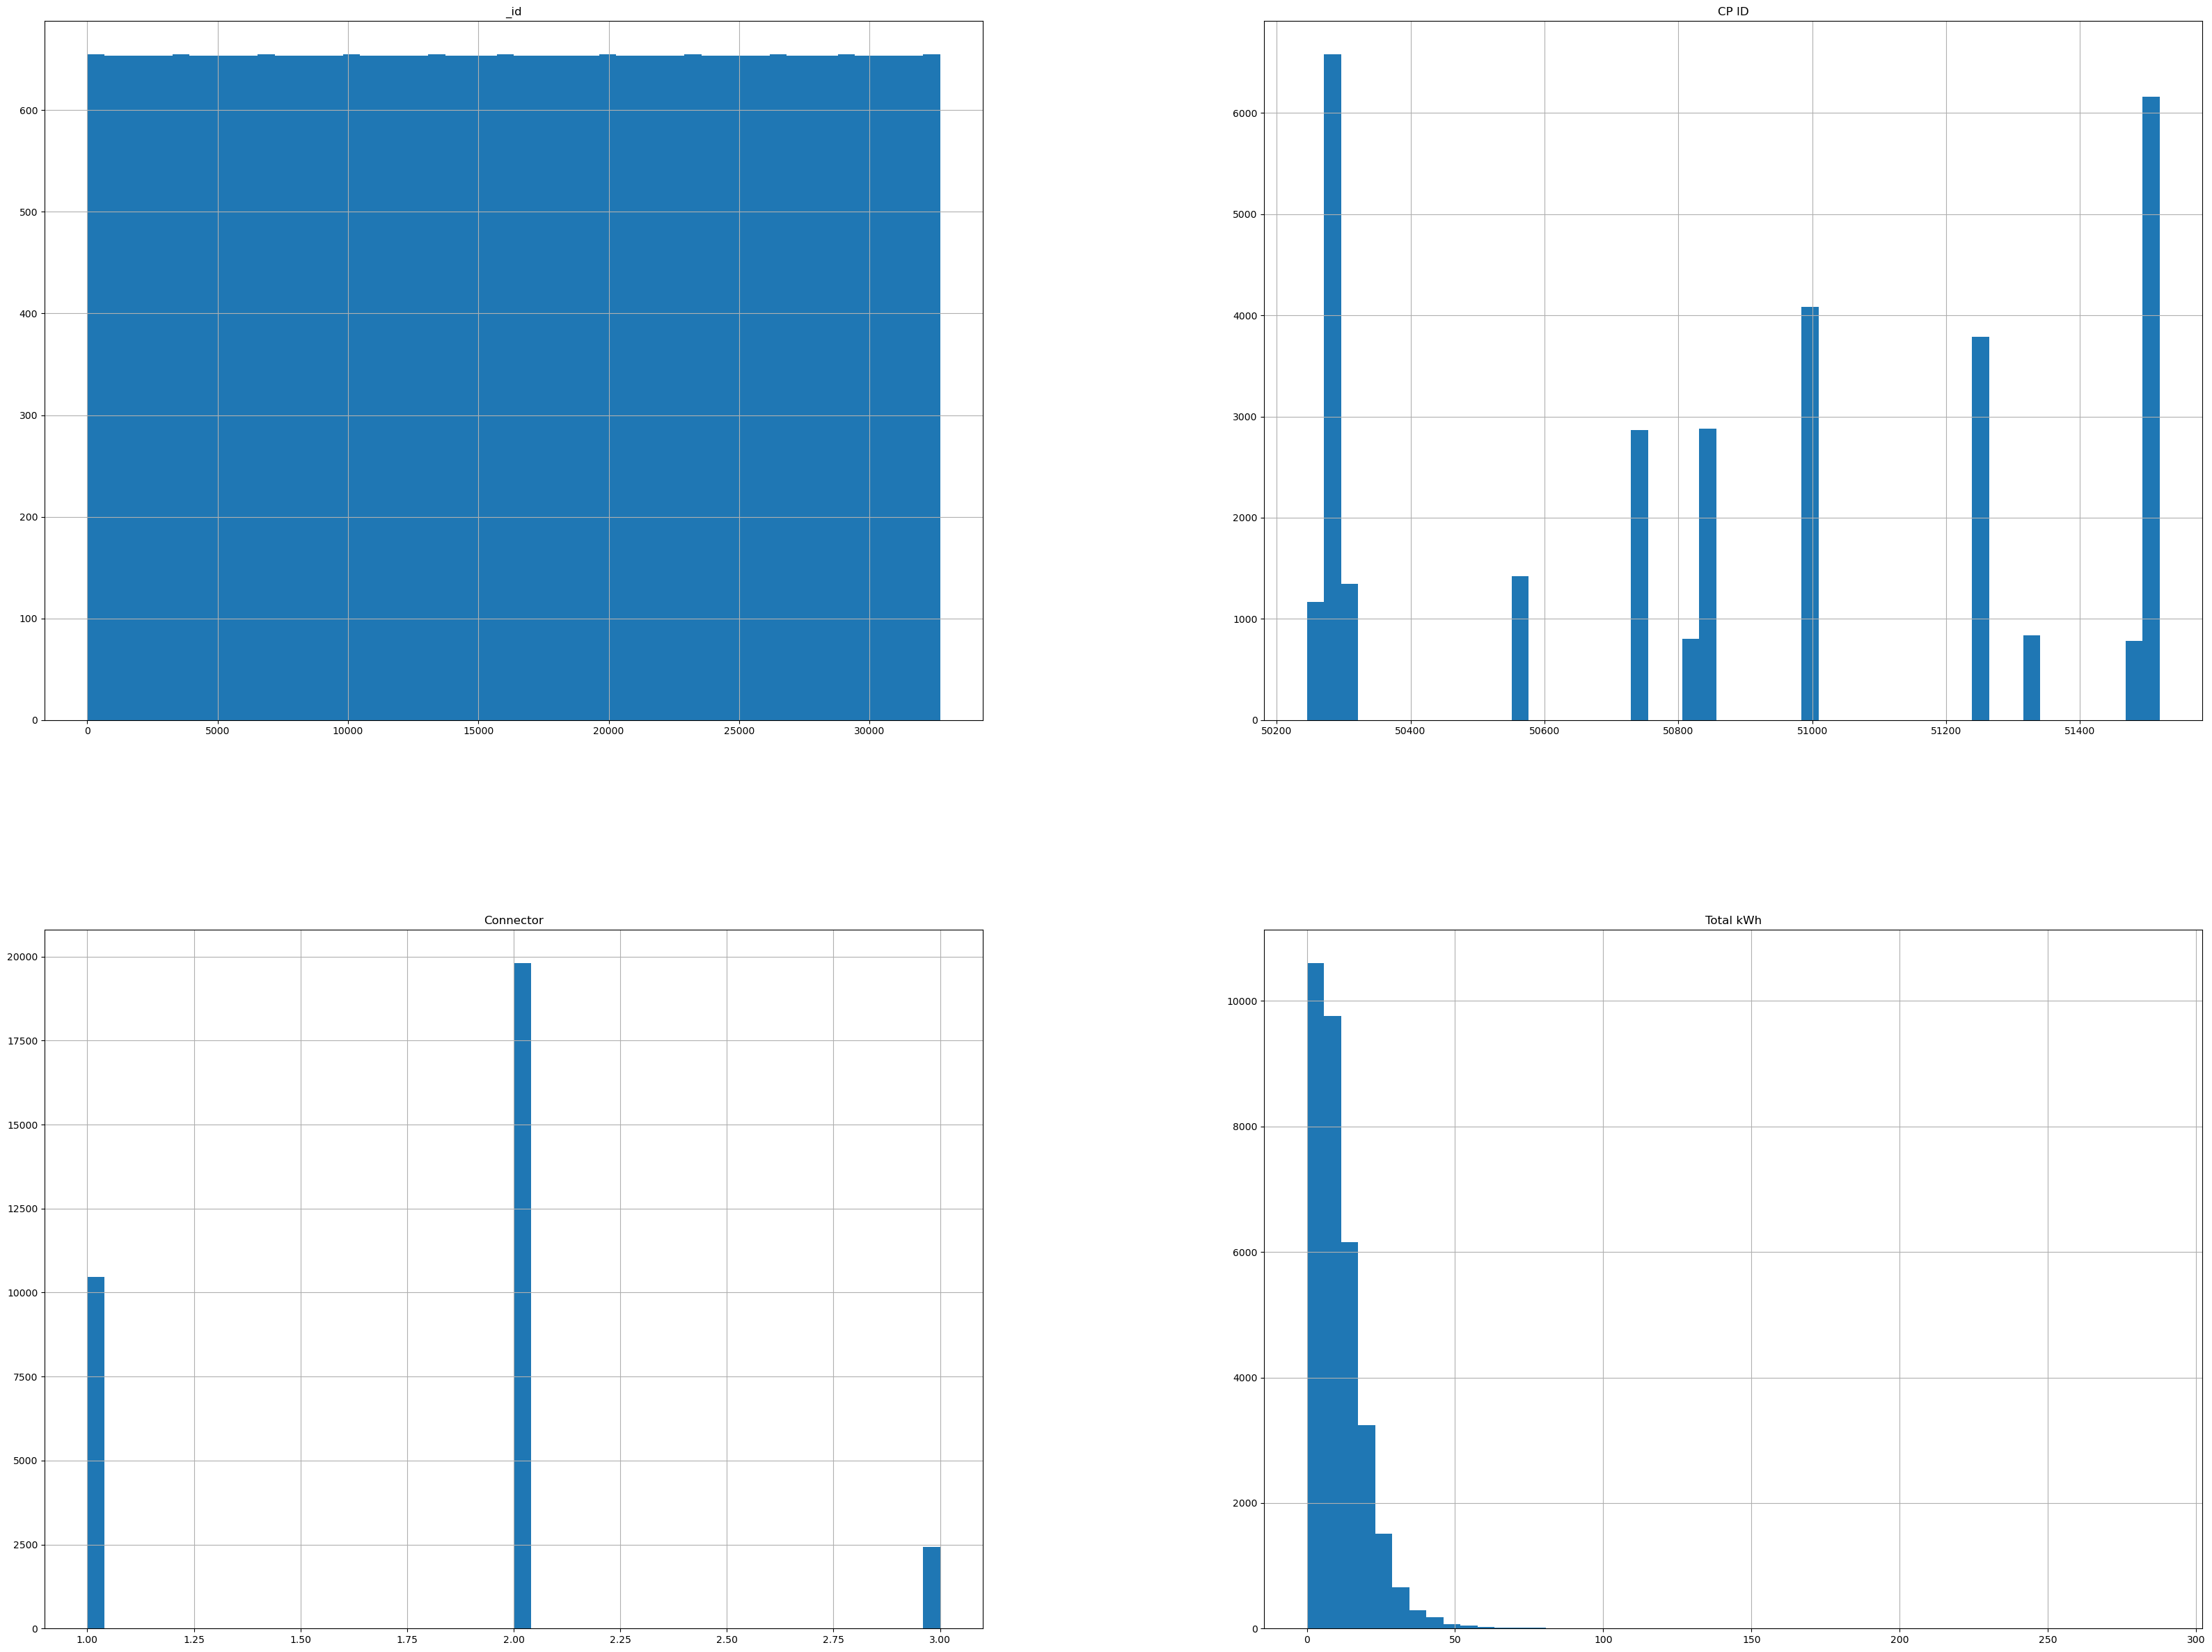

In [9]:
data_18_19.hist(bins=50, figsize=(40,30))
plt.show()

## Data Frames Combination

In [10]:
# assuming the dataframes are named data_16_17, data_17_18, data_18_19
data = pd.concat([data_16_17, data_17_18, data_18_19])

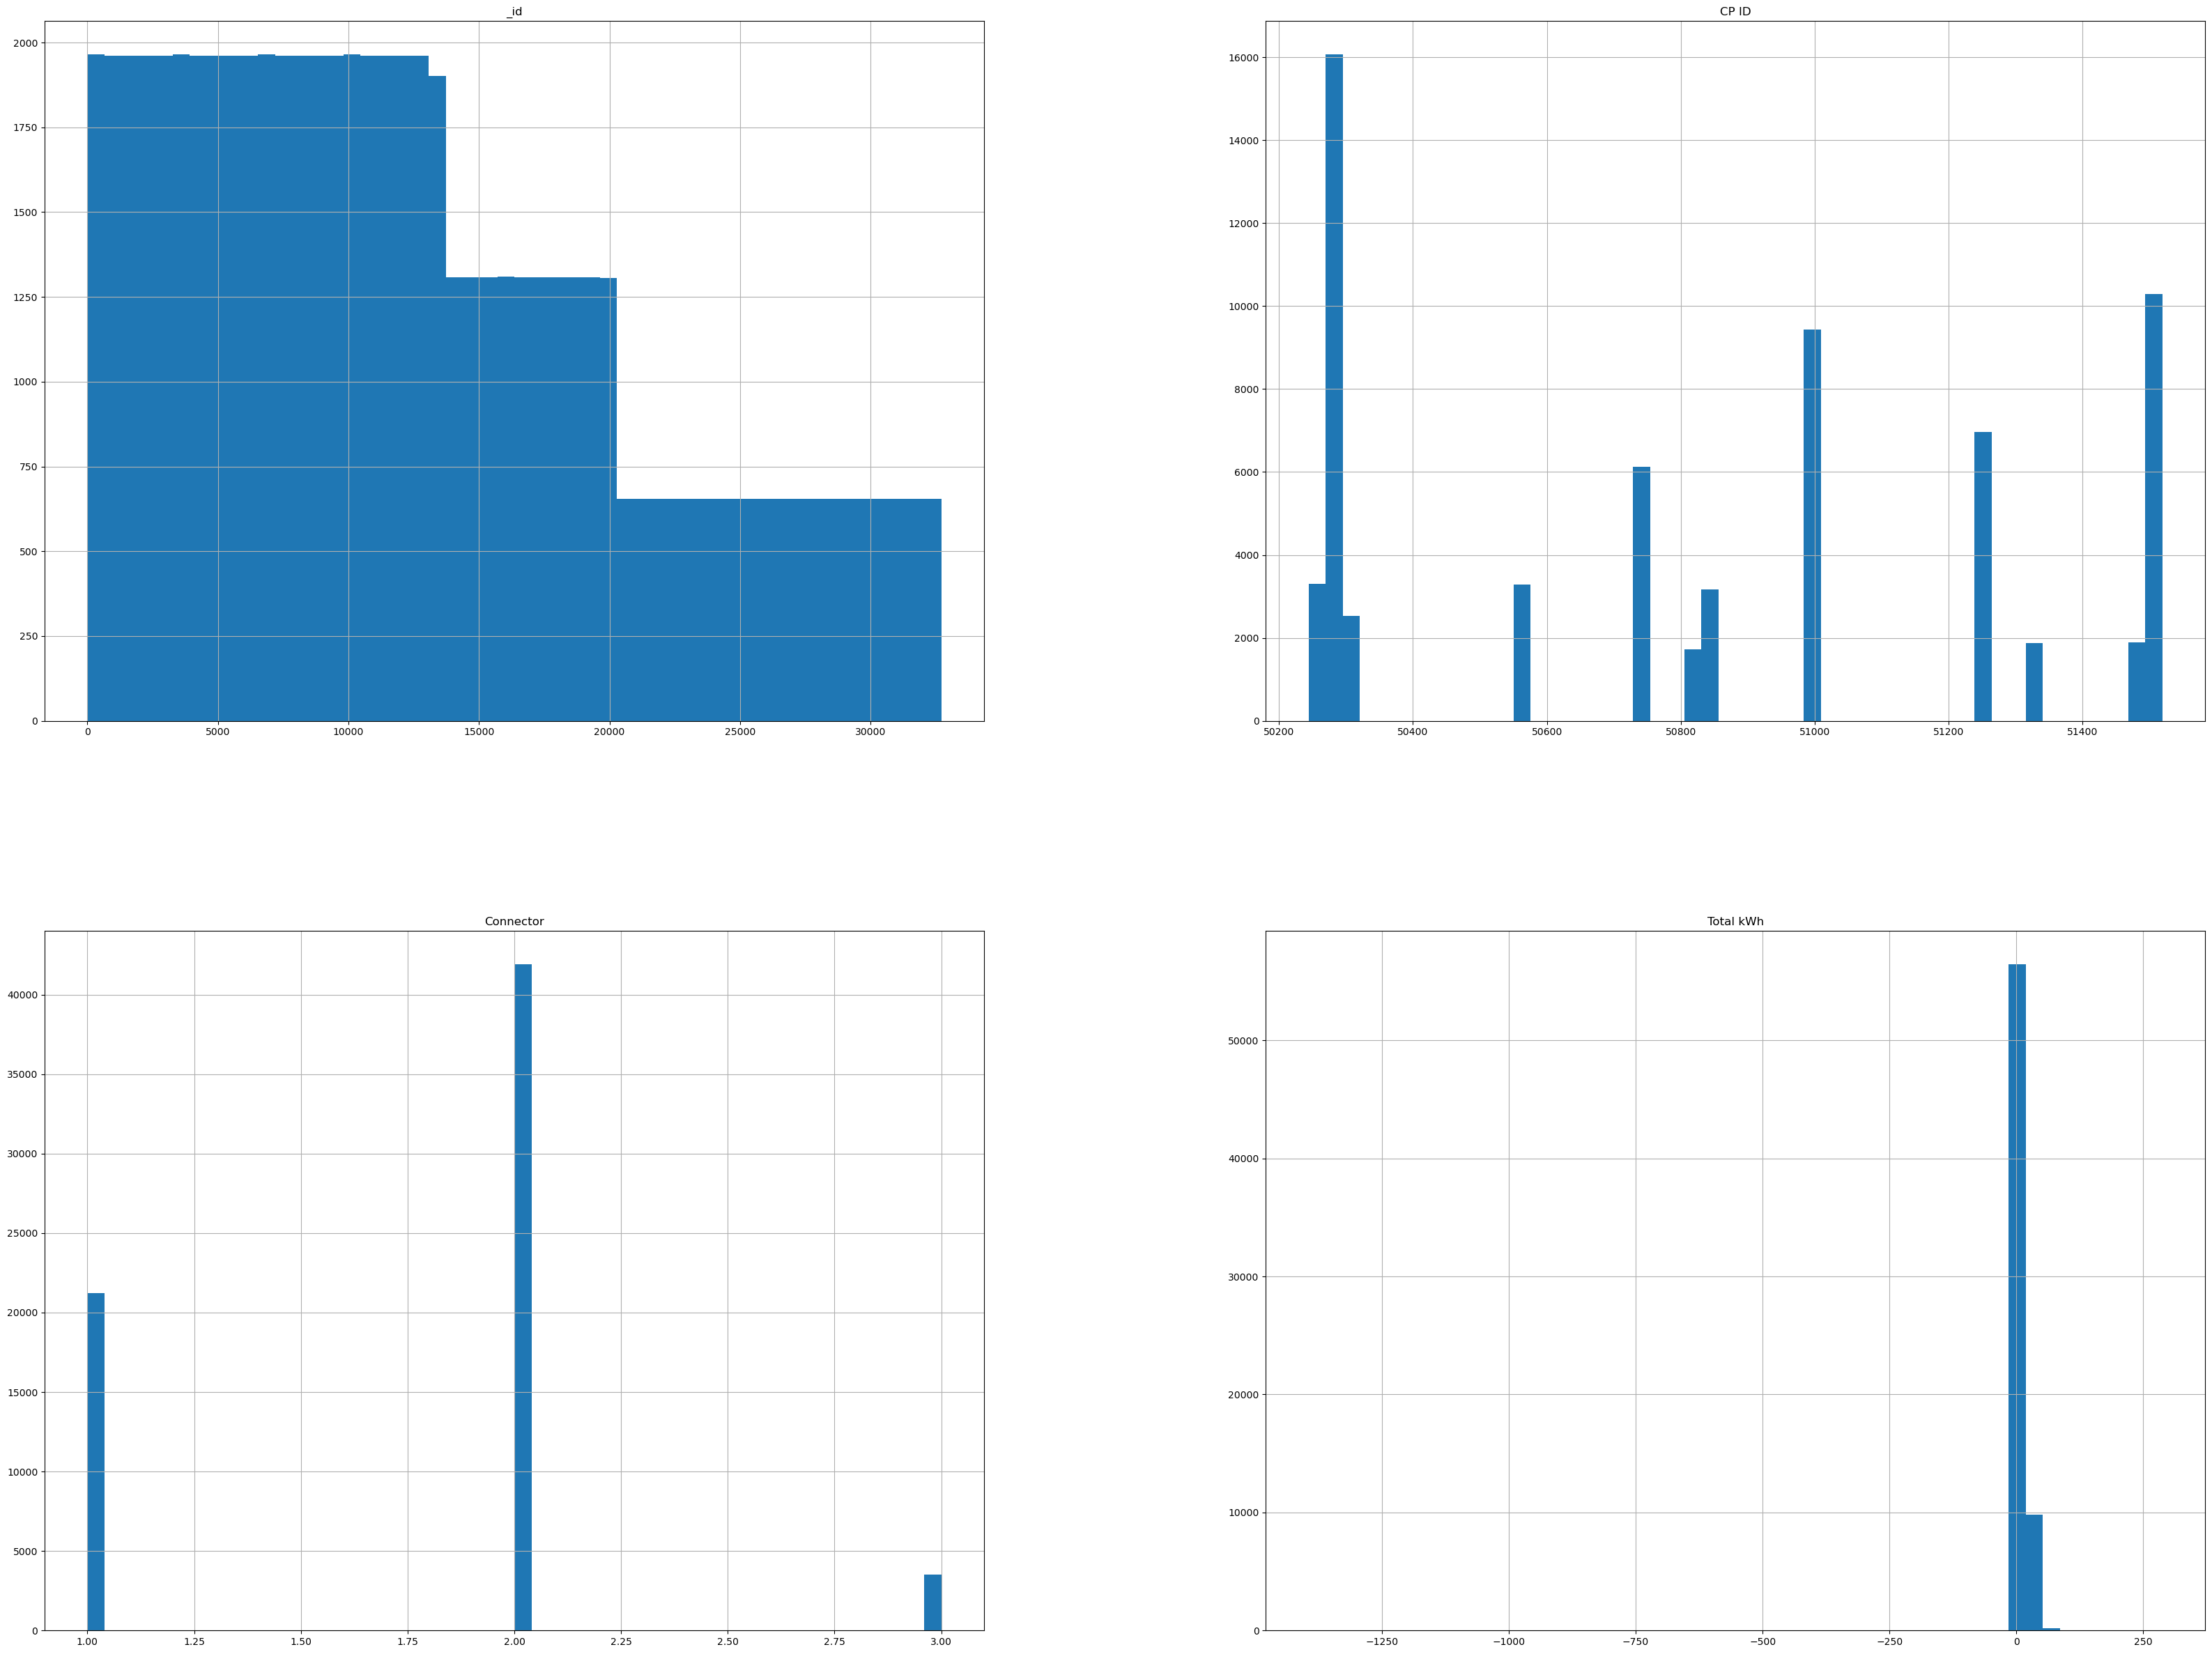

In [11]:
data.hist(bins=50, figsize=(40,30))
plt.show()

# Potential Follwing Steps:

    1. Data Collection and Preparation: Gather initial datasets, such as EV charging data, and preprocess it to a suitable format for exploratory data analysis and modeling.

    2. Exploratory Data Analysis (EDA): Understand the dataset's variables, their relationships, and data quality. This initial analysis will help identify patterns, trends, and outliers in the data.

    3. Develop a Preliminary Model: Use insights gained from the EDA to develop an initial machine learning model. This model serves as a baseline for further enhancements.

    4. Collect Additional Data: Gather external data sources to enrich your existing dataset. Specifically, retrieve weather data that provides context on environmental conditions when charging events occur. Also, collect geospatial data from OpenStreetMap (OSM) to understand the infrastructure around EV charging stations, such as the proximity to roads, buildings, and points of interest.

    5. Integrate Additional Data: Add the weather and OSM data to your dataset. This step might involve data alignment, interpolation, or resampling to match the format and structure of your original dataset.

    6. Conduct a Second Round of EDA: Incorporate the new features from the weather and OSM data and understand their effect on the dataset. This might reveal more complex patterns or relationships that were not apparent in the original dataset.

    7. Refine the Machine Learning Model: Based on the insights gained from the new EDA, adjust your machine learning model. This adjustment might include incorporating new features, tweaking model parameters, or even using a different model architecture.

    8. Evaluate the Enhanced Model: Test the performance of the refined model and compare it with the preliminary model. Look for improvements in accuracy, precision, recall, or any other relevant performance metrics.

    9. Iterate Model Refinement and Evaluation: Continue this process of model enhancement and evaluation as needed, until you achieve a satisfactory model performance. Machine learning development is iterative, and each cycle of refinement and evaluation should improve the model's performance.

    10. Document the Final Model: Record the details of the final model, its performance, and any insights gained throughout the process. This documentation is critical for understanding the model's development, for communicating the results to others, and for future reference.

    11. Plan for Future Improvements or Enhancements: Based on observations made during the project, plan for future enhancements. These might include collecting more diverse data, trying more sophisticated modeling techniques, or building a pipeline for continuous model updating and deployment.

# Pre - Processing

## Handling Time Series Formatting

    First, we'll handle the 24 hour issue. We need to ensure that all time is in a format that Python can understand. Python uses the 24-hour clock, so times should be represented as 00-23, not 24.

In [12]:
# assuming 'Start Time' and 'End Time' are the columns with time
data['Start Time'] = data['Start Time'].str.replace('24', '00')
data['End Time'] = data['End Time'].str.replace('24', '00')

    'Start Date' column also includes a time of '00:00:00'. We need to remove this to avoid confusion, especially since we have a separate 'Start Time' column.

In [13]:
data['Start Date'] = pd.to_datetime(data['Start Date']).dt.date
data['End Date'] = pd.to_datetime(data['End Date']).dt.date

In [14]:
data.head()

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2017-08-31,22:12,2017-08-31,23:11,18.27,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2017-08-31,22:01,2017-08-31,22:31,19.45,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,50575,2,2017-08-31,21:21,2017-08-31,21:59,19.71,"South Inch Car Park, Perth",APT Triple Rapid Charger
3,4,51516,2,2017-08-31,20:43,2017-08-31,21:03,9.84,Kinross Park and Ride,APT Triple Rapid Charger
4,5,50994,2,2017-08-31,19:50,2017-08-31,20:50,14.17,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger


    It is definitely a good idea to merge the date and time columns together to create one datetime column. This can be done as follows:

In [15]:
data['Start DateTime'] = pd.to_datetime(data['Start Date'].astype(str) + ' ' + data['Start Time'])
data['End DateTime'] = pd.to_datetime(data['End Date'].astype(str) + ' ' + data['End Time'])
data = data.drop(['Start Date', 'End Date', 'Start Time', 'End Time'], axis=1)


    Using 'Start Date Time' as an index or column is dictated by the specific use case and DataFrame operations. 'Start Date Time' as an index offers benefits for time-series analysis, especially with Pandas' optimized performance for DateTime indexes. Nonetheless, it may remain a column if suited to the use case.

In [16]:
data.set_index('Start DateTime', inplace=True)
data.sort_index(inplace=True)

In [17]:
data.head()

,_id,CP ID,Connector,Total kWh,Site,Model,End DateTime
Start DateTime,,,,,,,
2016-01-09 07:21:00,13676,50994,1,2.084,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,2016-01-09 07:27:00
2016-01-09 07:51:00,13675,50281,2,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 09:01:00
2016-01-09 08:22:00,13674,50285,1,13.930,Broxden Park & Ride,APT 22kW Dual Outlet,2016-01-09 14:32:00
2016-01-09 08:54:00,13673,50281,1,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 16:37:00
2016-01-09 09:22:00,13672,50745,2,3.580,Kinross Park and Ride,APT Triple Rapid Charger,2016-01-09 09:37:00


## Exploratory Data Analysis

    Understanding the Dataset:

        Check the first few rows of the dataset using the head() function.
        Understand the number of rows and columns using the shape attribute.
        Get the column names using the columns attribute.
        Get information about the datatype of each column, number of non-null entries etc. using the info() function.

    Descriptive Statistics:

        Use the describe() function to get the central tendency, dispersion and shape of the dataset’s distribution.

    Handling Missing Values:

        Check for missing values using the isna() function. You've already done this and you have 185 missing values in 'Total kWh' and 'End DateTime' columns.
        Decide on a strategy to handle the missing values. This could be removing the rows with missing values, or filling the missing values with mean, median, or mode of the rest of the data.

    Visualizing the Dataset:

        Histograms: Plot histograms of each column to visualize the distribution of values.
        Boxplots: Plot boxplots to visualize the spread and skewness of the data.
        Correlation Matrix: Use a correlation matrix or a heatmap to see the correlation between different numeric variables.

    Time Series Specific Analysis:

        Line Plots: Plot the 'Total kWh' against time to visualize how the power demand changes over time.
        Seasonality: Check for seasonality patterns, which are trends that repeat after a specific time interval. This could be daily, weekly, monthly, or annually.
        Trend Analysis: Check if there's a consistent upward or downward slope in the 'Total kWh' over time.
        Decomposition: Decompose the time series to observe its trend, seasonality, and residual components separately.

    Outlier Detection:

        Use scatter plots, boxplots or IQR (interquartile range) methods to identify any outliers in your data.

    Feature Relationships:

        Use scatter plots or pair plots to visualize relationships between different numeric features.
        Visualize the average power demand ('Total kWh') for different categories in 'Site' and 'Model' columns to see if there are any significant differences.

### Understanding the dataset

In [18]:
data.head()

,_id,CP ID,Connector,Total kWh,Site,Model,End DateTime
Start DateTime,,,,,,,
2016-01-09 07:21:00,13676,50994,1,2.084,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,2016-01-09 07:27:00
2016-01-09 07:51:00,13675,50281,2,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 09:01:00
2016-01-09 08:22:00,13674,50285,1,13.930,Broxden Park & Ride,APT 22kW Dual Outlet,2016-01-09 14:32:00
2016-01-09 08:54:00,13673,50281,1,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 16:37:00
2016-01-09 09:22:00,13672,50745,2,3.580,Kinross Park and Ride,APT Triple Rapid Charger,2016-01-09 09:37:00


In [19]:
data.shape

(66664, 7)

In [20]:
data.columns

Index(['_id', 'CP ID', 'Connector', 'Total kWh', 'Site', 'Model',
       'End DateTime'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66664 entries, 2016-01-09 07:21:00 to 2019-12-08 22:45:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   _id           66664 non-null  int64         
 1   CP ID         66664 non-null  int64         
 2   Connector     66664 non-null  int64         
 3   Total kWh     66479 non-null  float64       
 4   Site          66664 non-null  object        
 5   Model         66664 non-null  object        
 6   End DateTime  66479 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 4.1+ MB


Descriptive Statistics

In [22]:
data.describe()

,_id,CP ID,Connector,Total kWh
count,66664.000000,66664.000000,66664.000000,66479.000000
mean,12512.494675,50833.965049,1.734264,10.758277
std,8540.498227,467.454603,0.548223,10.302026
min,1.000000,50244.000000,1.000000,-1394.711000
25%,5556.000000,50286.000000,1.000000,5.040000
50%,11111.000000,50838.000000,2.000000,8.720000
75%,18161.250000,51250.000000,2.000000,14.840000
max,32711.000000,51519.000000,3.000000,287.710000


# Data Cleaning   

## Handling NaN values

    This function checks each numeric column, counts the number of NaN values, and if it's less than 5% of the total rows in the DataFrame, it drops the entire column, else it replaces NaNs with the mean:

In [23]:
data.isna().sum()

_id               0
CP ID             0
Connector         0
Total kWh       185
Site              0
Model             0
End DateTime    185
dtype: int64

In [24]:
def drop_nan_columns(df, threshold=0.05):
    """
    Drop columns from df where the proportion of NaN values exceeds the threshold.
    """
    for col in df.columns:
        if df[col].isnull().mean() > threshold:
            df = df.drop(col, axis=1)
            print(f"Dropped column '{col}' due to more than {threshold*100}% missing values.")
    return df


def fill_nan_with_mean(df):
    """
    Fill numeric columns in df with NaN values with the mean value of the column.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    for col in numeric_cols:
        num_nans = df[col].isnull().sum()
        if num_nans > 0:
            df[col] = df[col].fillna(df[col].mean())
            percentage_nans = (num_nans / df.shape[0]) * 100  # calculate percentage of NaN values
            print(f"Replaced {num_nans} NaN values ({percentage_nans:.2f}%) in column '{col}' with the mean of the column.")
    return df


def fill_nan_with_mode(df):
    """
    Fill categorical columns in df with NaN values with the mode (most frequent value) of the column.
    """
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        num_nans = df[col].isnull().sum()
        if num_nans > 0:
            df[col] = df[col].fillna(df[col].mode()[0])  # replace NaNs with the mode
            percentage_nans = (num_nans / df.shape[0]) * 100  # calculate percentage of NaN values
            print(f"Replaced {num_nans} NaN values ({percentage_nans:.2f}%) in column '{col}' with the mode of the column.")
    return df


def process_nan_values(df, drop_threshold=0.05):
    """
    Process NaN values in a dataframe.
    
    Columns where the proportion of NaNs exceeds drop_threshold are dropped.
    Remaining NaNs in numeric columns are replaced with the column mean.
    """
    df = drop_nan_columns(df, threshold=drop_threshold)
    df = fill_nan_with_mean(df)
    fill_nan_with_mode(df)
    return df


df = process_nan_values(data)

Replaced 185 NaN values (0.28%) in column 'Total kWh' with the mean of the column.


In [25]:
X_base = df.drop('_id', axis=1)
y_base = df['Total kWh']
print(X_base.shape)

# Number of unique values for each column
counts = X_base.nunique()
# record columns to delete
single_value = [i for i,v in enumerate(counts) if v == 1]
print(single_value)

(66664, 6)
[]


In [26]:
y_base

Start DateTime
2016-01-09 07:21:00     2.084000
2016-01-09 07:51:00     3.870000
2016-01-09 08:22:00    13.930000
2016-01-09 08:54:00    10.380000
2016-01-09 09:22:00     3.580000
                         ...    
2019-12-08 20:34:00    10.758277
2019-12-08 20:47:00    10.080000
2019-12-08 21:01:00     4.690000
2019-12-08 22:27:00    14.710000
2019-12-08 22:45:00     7.930000
Name: Total kWh, Length: 66664, dtype: float64

## Uniqueness

Column 'CP ID' has 36 unique values (0.05%).
Column 'Connector' has 3 unique values (0.00%).
Column 'Total kWh' has 14088 unique values (21.13%).
Column 'Site' has 22 unique values (0.03%).
Column 'Model' has 7 unique values (0.01%).
Column 'End DateTime' has 63577 unique values (95.37%).


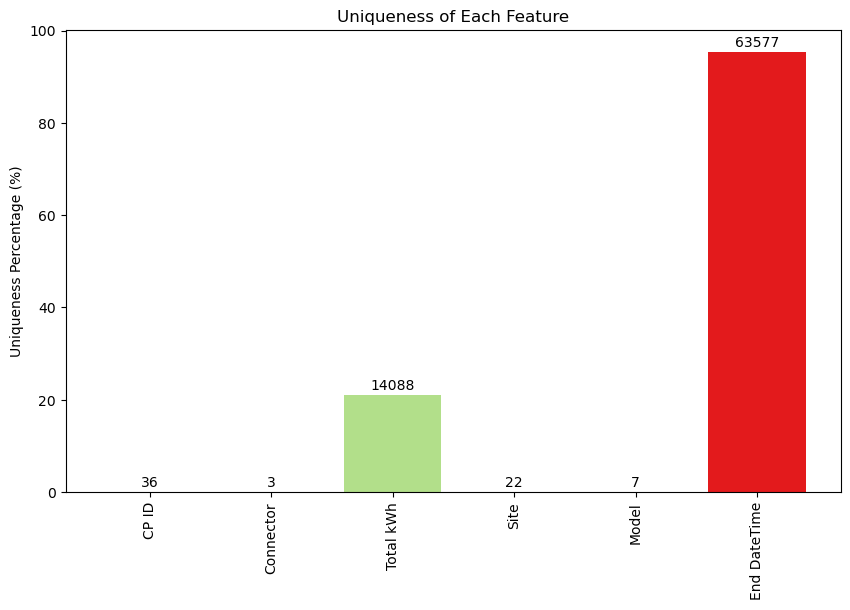

In [27]:
def calculate_uniqueness(df):
    """
    Calculate the uniqueness of each column in a dataframe.
    Returns a dictionary with the percentage of unique values and number of unique values for each column.
    """
    num_rows = df.shape[0]
    uniqueness_dict = {}
    
    for col in df.columns:
        num_unique_values = df[col].nunique()
        uniqueness_percentage = (num_unique_values / num_rows) * 100
        uniqueness_dict[col] = (uniqueness_percentage, num_unique_values)
        print(f"Column '{col}' has {num_unique_values} unique values ({uniqueness_percentage:.2f}%).")
    
    return uniqueness_dict

def plot_uniqueness(uniqueness_dict):
    """
    Plot the percentage of unique values for each feature in a dataframe.
    Also, annotate each bar with the number of unique values.
    """
    # Prepare data for plotting
    labels = uniqueness_dict.keys()
    uniqueness_percentages = [val[0] for val in uniqueness_dict.values()]
    num_unique_values = [val[1] for val in uniqueness_dict.values()]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(labels, uniqueness_percentages, color=plt.cm.Paired(np.arange(len(labels))))
    plt.ylabel('Uniqueness Percentage (%)')
    plt.title('Uniqueness of Each Feature')
    plt.xticks(rotation=90)
    
    # Adding labels to bars
    for bar, unique_count in zip(bars, num_unique_values):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, unique_count, ha='center', va='bottom')

    plt.show()

# Call the functions
uniqueness_dict = calculate_uniqueness(X_base)
plot_uniqueness(uniqueness_dict)



## Variance Filtering

It is not really necessary becasue we are working with a low number of features, and most of them are categorical values. So we dont have continuos values. 

Variance of Connector: 0.30054893006214817


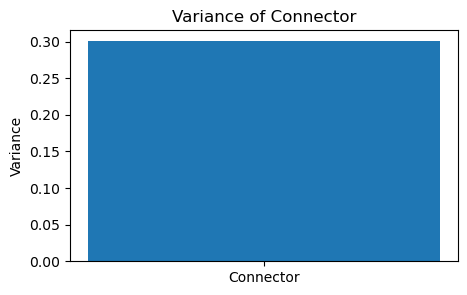

Variance of Total kWh: 105.83719936870065


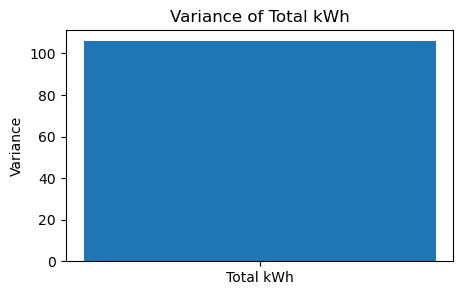

In [28]:
def calculate_feature_variances(df):
    """
    Calculate the variance of each column in a dataframe.
    Return a Series with the column name as the index and the variance as the value.
    """
    # Drop identifier columns
    df = df.drop(['CP ID'], axis=1)

    # Calculate variances
    variances = df.var(numeric_only=True)

    return variances


def plot_feature_variances(variances):
    """
    Plot the variance for each column in the variances Series
    and print the variance.
    """
    # Print and plot each variance
    for column, variance in variances.items():
        print(f'Variance of {column}: {variance}')

        plt.figure(figsize=(5, 3))
        plt.bar(column, variance)
        plt.ylabel('Variance')
        plt.title(f'Variance of {column}')
        plt.show()

# Usage:
variances = calculate_feature_variances(X_base)
plot_feature_variances(variances)


    If the 'Connector' feature is categorical and encoded as integers, then using VarianceThreshold may not be appropriate. VarianceThreshold is generally used for continuous numerical data. For categorical data, you might want to consider other methods of feature selection that are more appropriate for categorical data. For example, you could use chi-square test to test the independence between the categorical feature and the target variable. The features that are independent of the target variable can be dropped as they don't contribute to the model.

In [29]:
def plot_column_histograms_eu(dataframe, col_dict, fig_size=(10, 5)):
    """
    Plot histograms for multiple columns of a Pandas DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The input DataFrame containing the columns to plot.
    col_dict (dict): A dictionary where each key is the name of a figure, and each value is a list of column names to plot in that figure.
    fig_size (tuple): The size of the figure in inches (default: (10, 5)).

    Returns:
    None
    """
    for fig_title, col_names in col_dict.items():
        file_path_destination = os.path.join(cwd, '..', '..', '..', 'data', 'output',
                        'spatial_disaggregation',
                        'data_visualization',
                        'histogram',
                        'EU',
                        f"{fig_title}_histogram_EU_withou_Zeros.png")
        
        # Check if columns exist in the dataframe
        plot_cols = [col for col in col_names if col in dataframe.columns]

        if len(plot_cols) == 0:
            print(f"No columns found for figure '{fig_title}'")
            continue

        # Determine the number of subplots and the number of rows and columns needed
        num_subplots = len(plot_cols)
        num_cols = min(num_subplots, 4)
        num_rows = math.ceil(num_subplots / num_cols)

        # Create the figure and subplots
        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size, squeeze=False)
        fig.suptitle(f"{fig_title}_EU")

        # Remove any unused subplots
        for i in range(num_subplots, num_rows * num_cols):
            fig.delaxes(axs.flatten()[i])

        for i, col_name in enumerate(plot_cols):
            try:
                row = i // num_cols
                col = i % num_cols
                axs[row, col].hist(dataframe[col_name], bins=40, facecolor='b', edgecolor='white')
                xlabel = col_name.split('_')[0]  # use the first part of the column name
                axs[row, col].set_title(f"{xlabel} Histogram")
                axs[row, col].set_xlabel(f'(range: {dataframe[col_name].min()} - {dataframe[col_name].max()})', rotation=0)  # rotate the label for better readability
                
                # Add y-axis label to the first column of histograms
                if col == 0:
                    axs[row, col].set_ylabel("NUTS3 frequency")
                else:
                    axs[row, col].set_title(f"{xlabel} Histogram")
                
            except ValueError:
                print(f"Skipping column '{col_name}' because of 'ValueError: autodetected range of [nan, nan] is not finite'")


        fig.subplots_adjust(hspace=0.5)
        
        # Save data to file if it doesn't exist
        if not os.path.exists(file_path_destination):
            plt.savefig(file_path_destination)
        plt.show()

In [30]:
y_base

Start DateTime
2016-01-09 07:21:00     2.084000
2016-01-09 07:51:00     3.870000
2016-01-09 08:22:00    13.930000
2016-01-09 08:54:00    10.380000
2016-01-09 09:22:00     3.580000
                         ...    
2019-12-08 20:34:00    10.758277
2019-12-08 20:47:00    10.080000
2019-12-08 21:01:00     4.690000
2019-12-08 22:27:00    14.710000
2019-12-08 22:45:00     7.930000
Name: Total kWh, Length: 66664, dtype: float64

## Data Split to prevent leakage

    It's important to note that we should avoid "leakage" in this process. For example, with mean encoding, we should calculate the means using the training data only, not the validation or test data.

    The stratify parameter in train_test_split() is generally used when your target variable (y_base in this case) is categorical and you want to ensure your training set and test set have the same proportions of class labels as the input dataset.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.2, random_state=12)

# Categorical Data Encoding

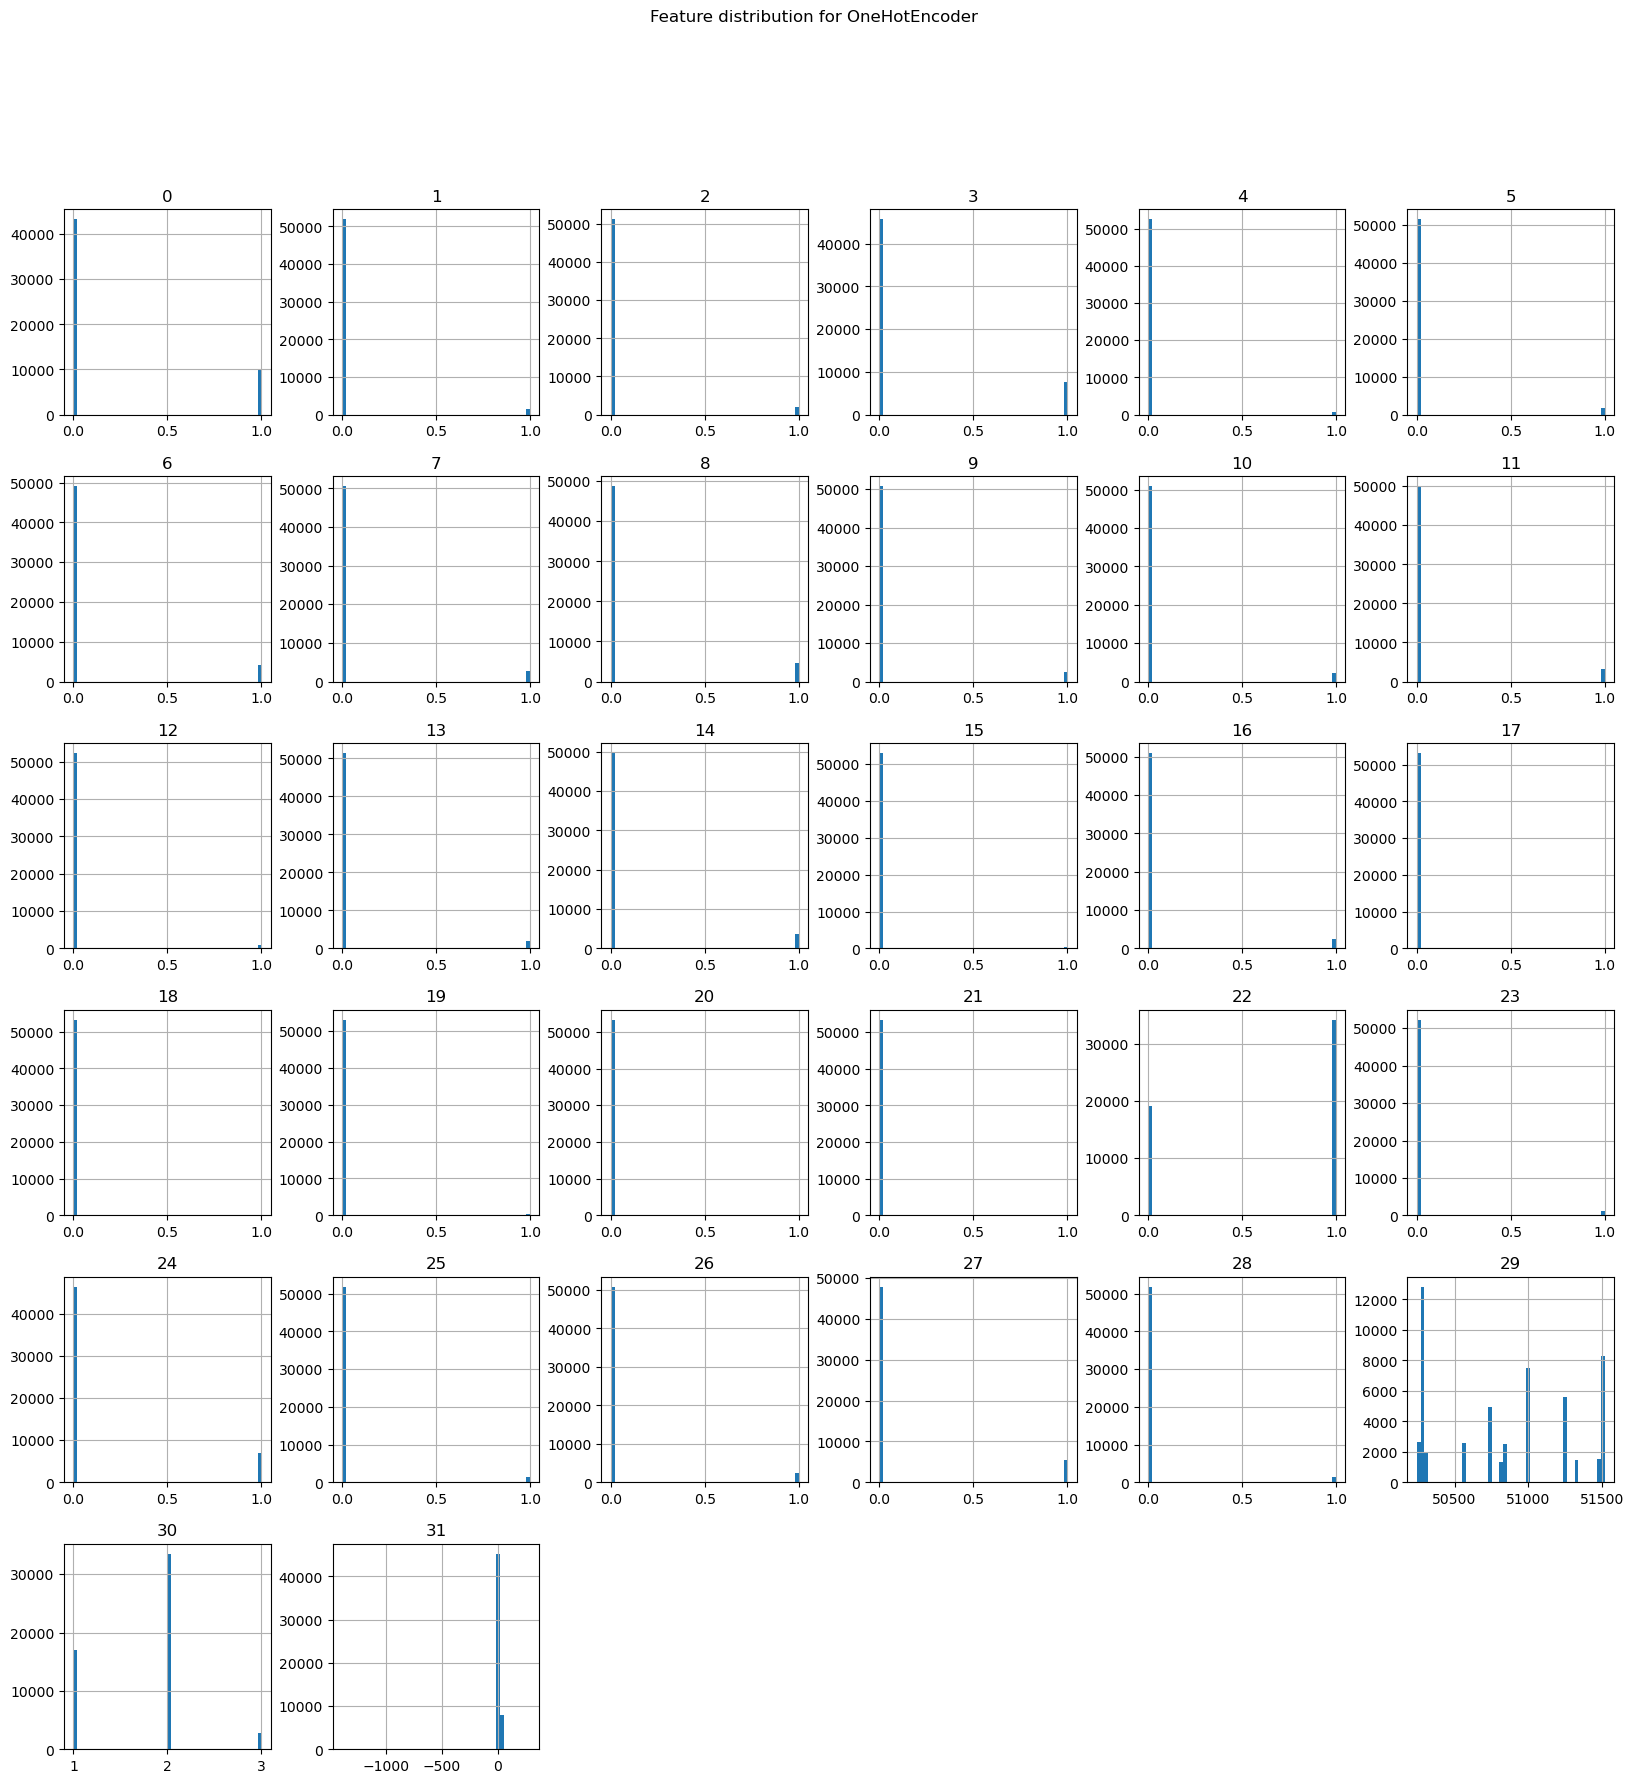

Average MSE for OneHotEncoder: 1.6801261354327127e-27
Average R2 for OneHotEncoder: 1.0


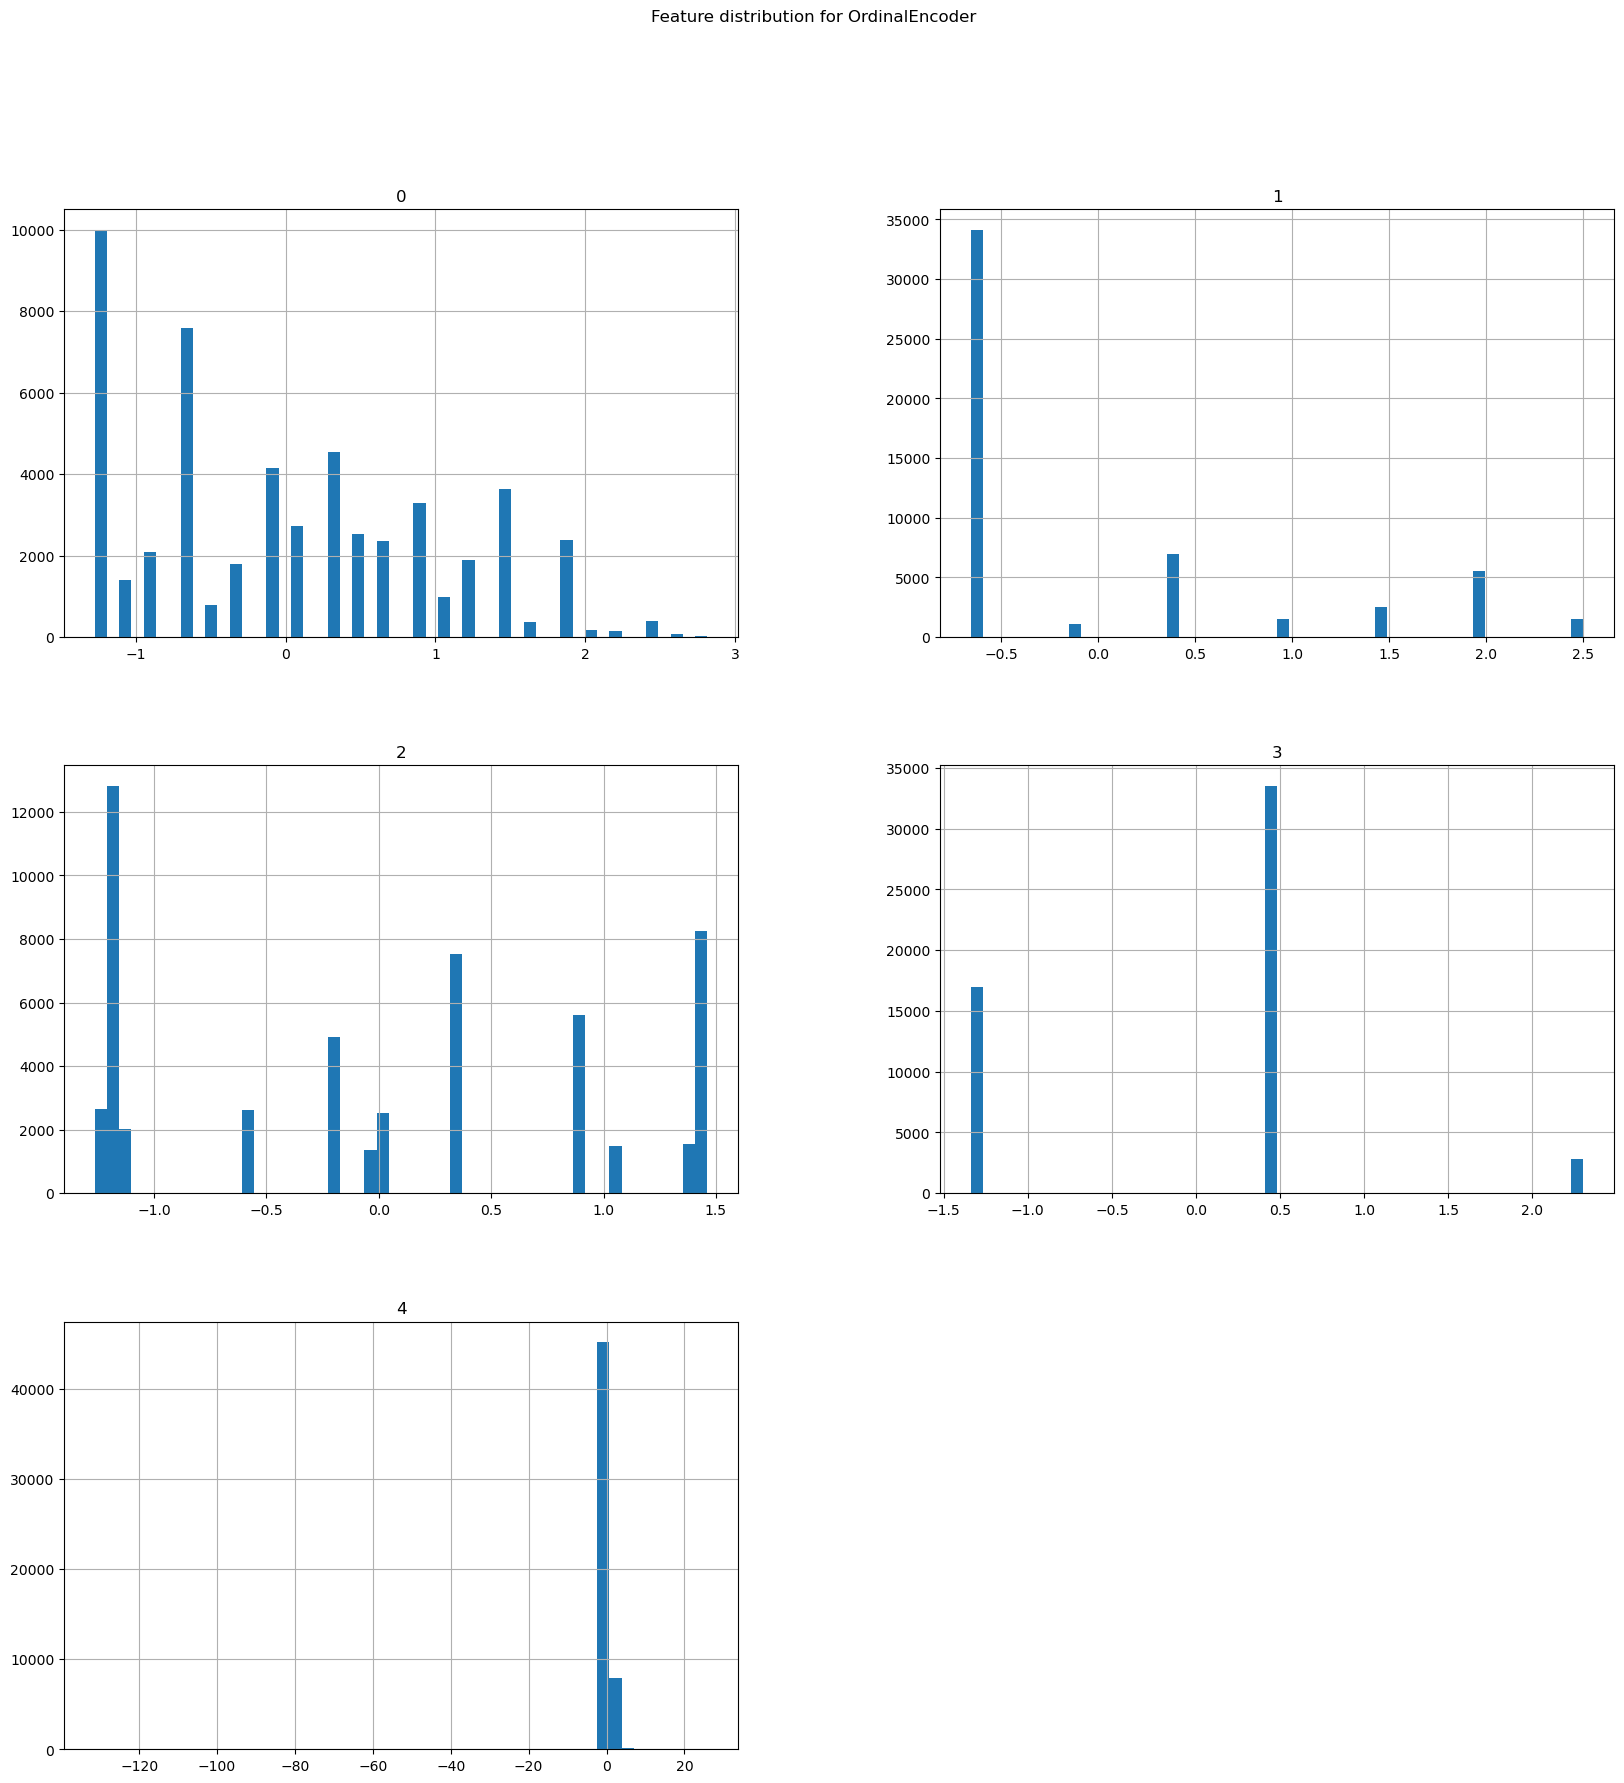

Average MSE for OrdinalEncoder: 8.090114906129759e-29
Average R2 for OrdinalEncoder: 1.0


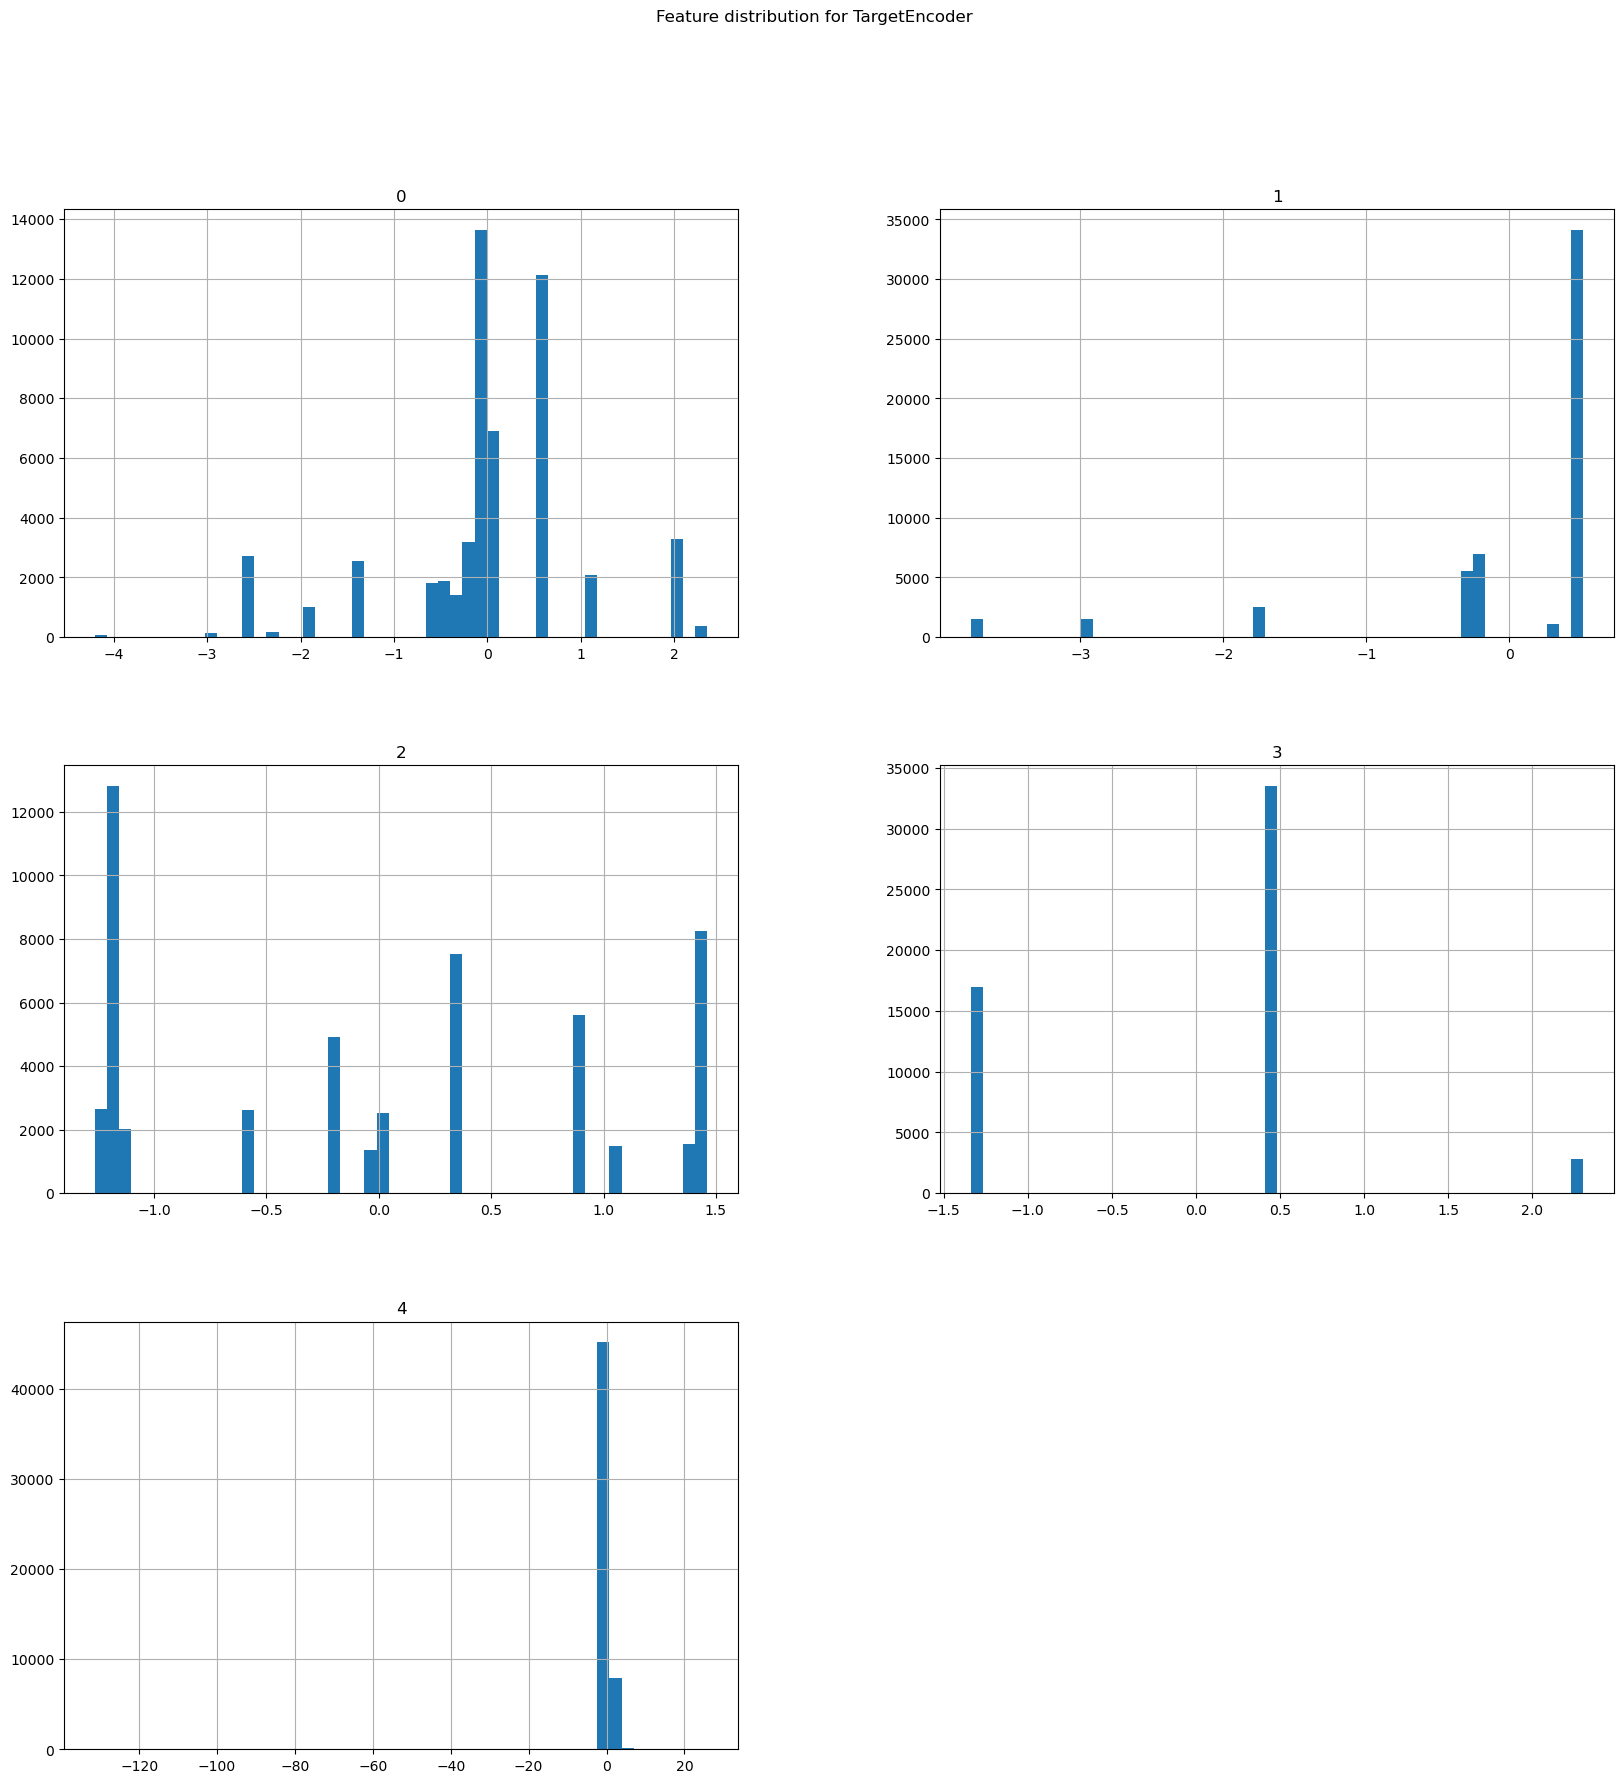

Average MSE for TargetEncoder: 7.478188532277226e-28
Average R2 for TargetEncoder: 1.0


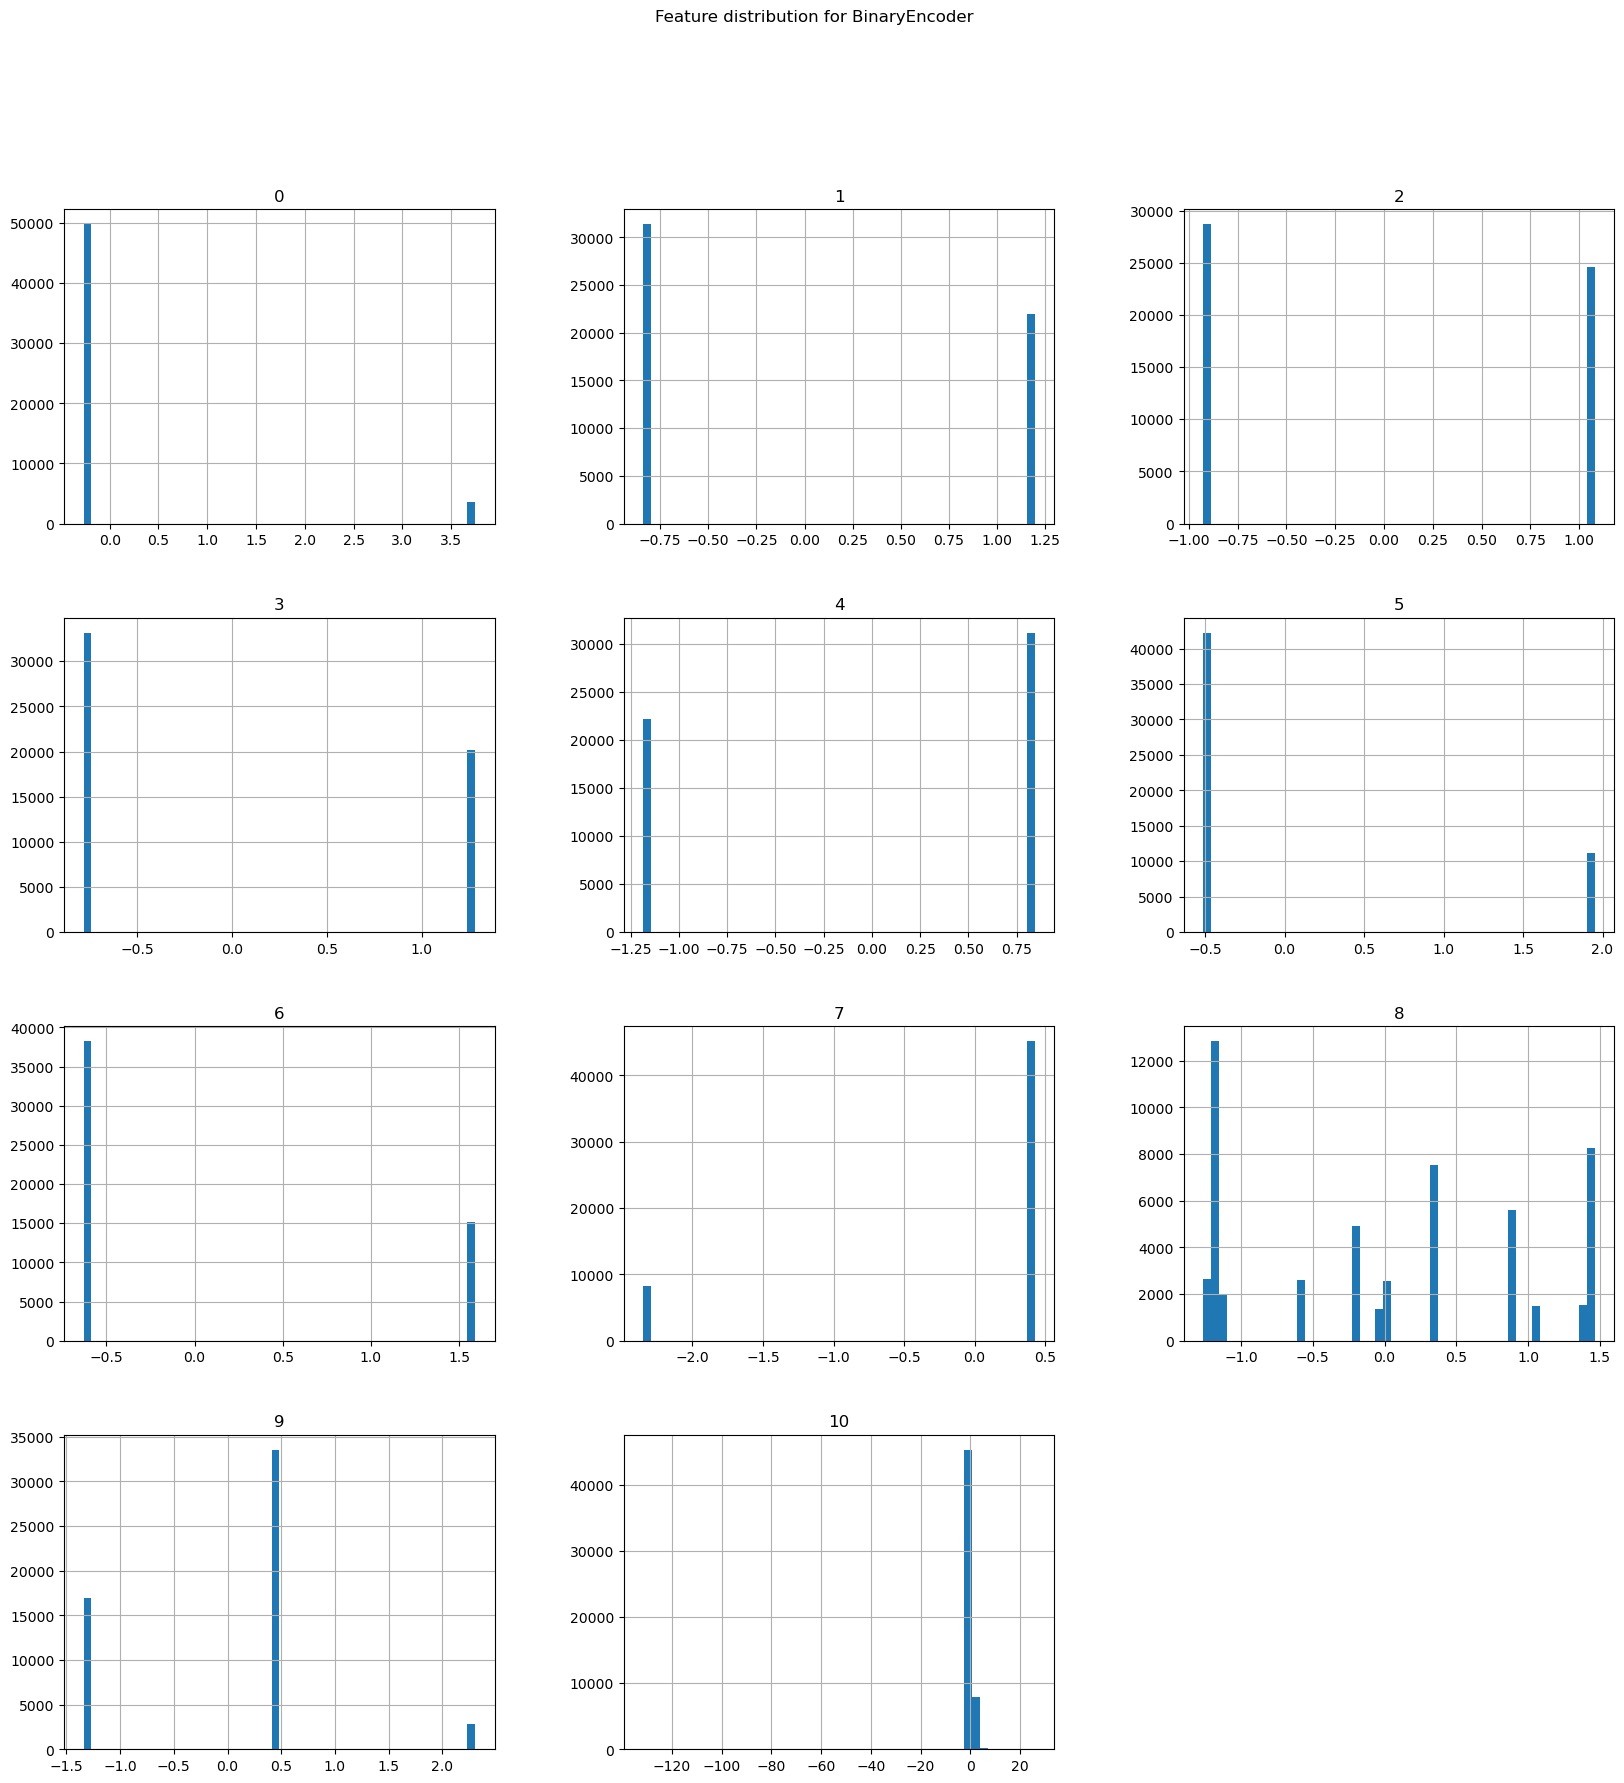

Average MSE for BinaryEncoder: 5.824120131460628e-29
Average R2 for BinaryEncoder: 1.0


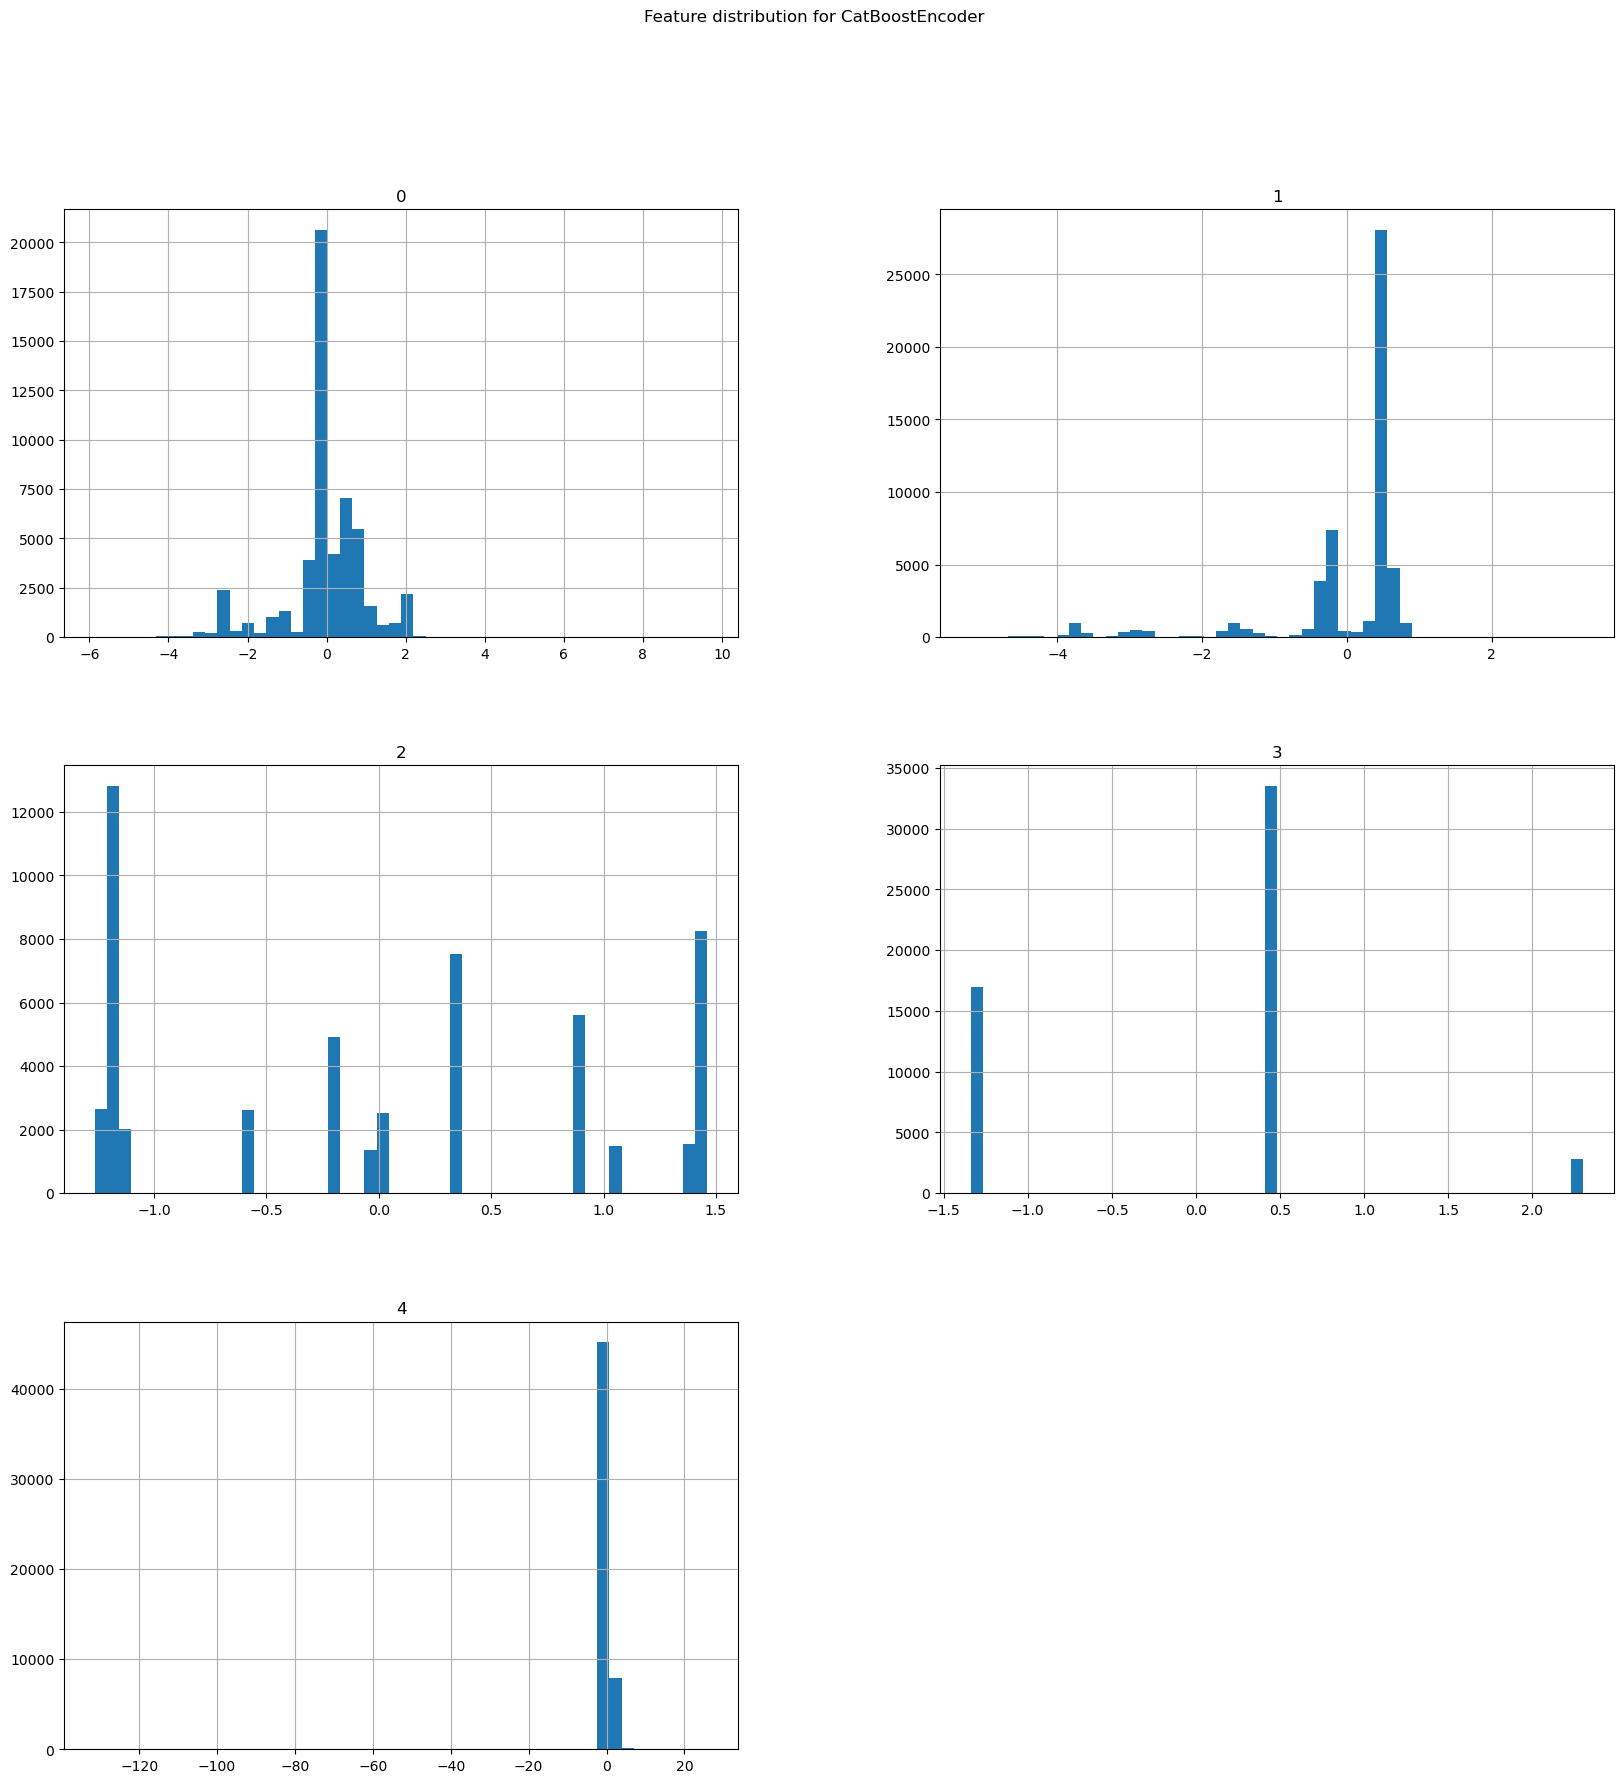

Average MSE for CatBoostEncoder: 2.4811369649019354e-28
Average R2 for CatBoostEncoder: 1.0


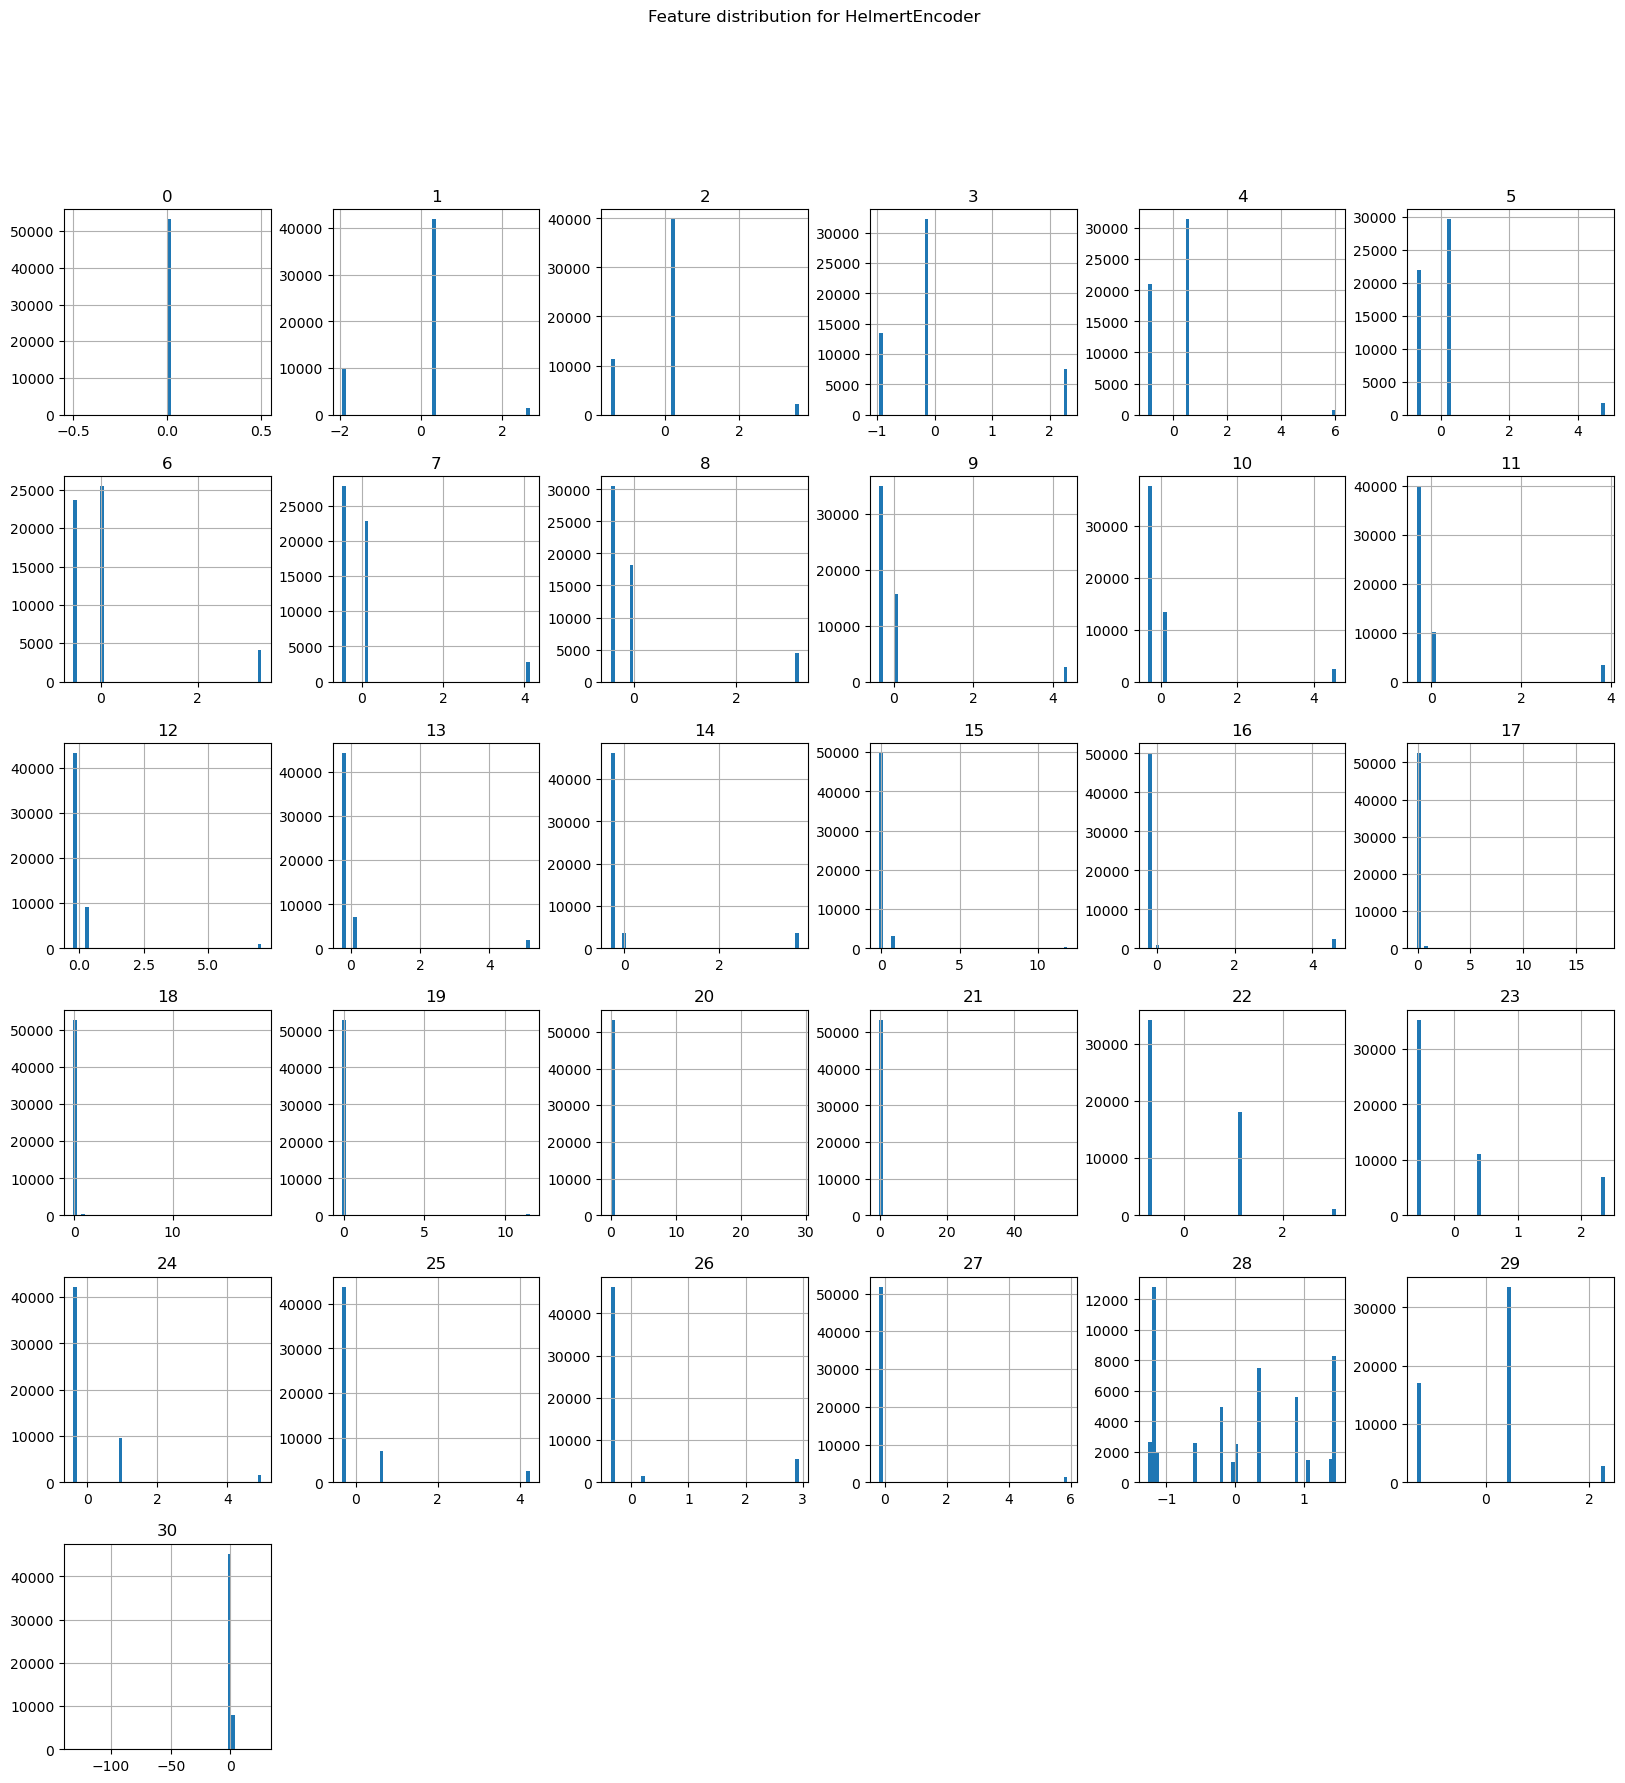

Average MSE for HelmertEncoder: 1.8557993631136837e-28
Average R2 for HelmertEncoder: 1.0


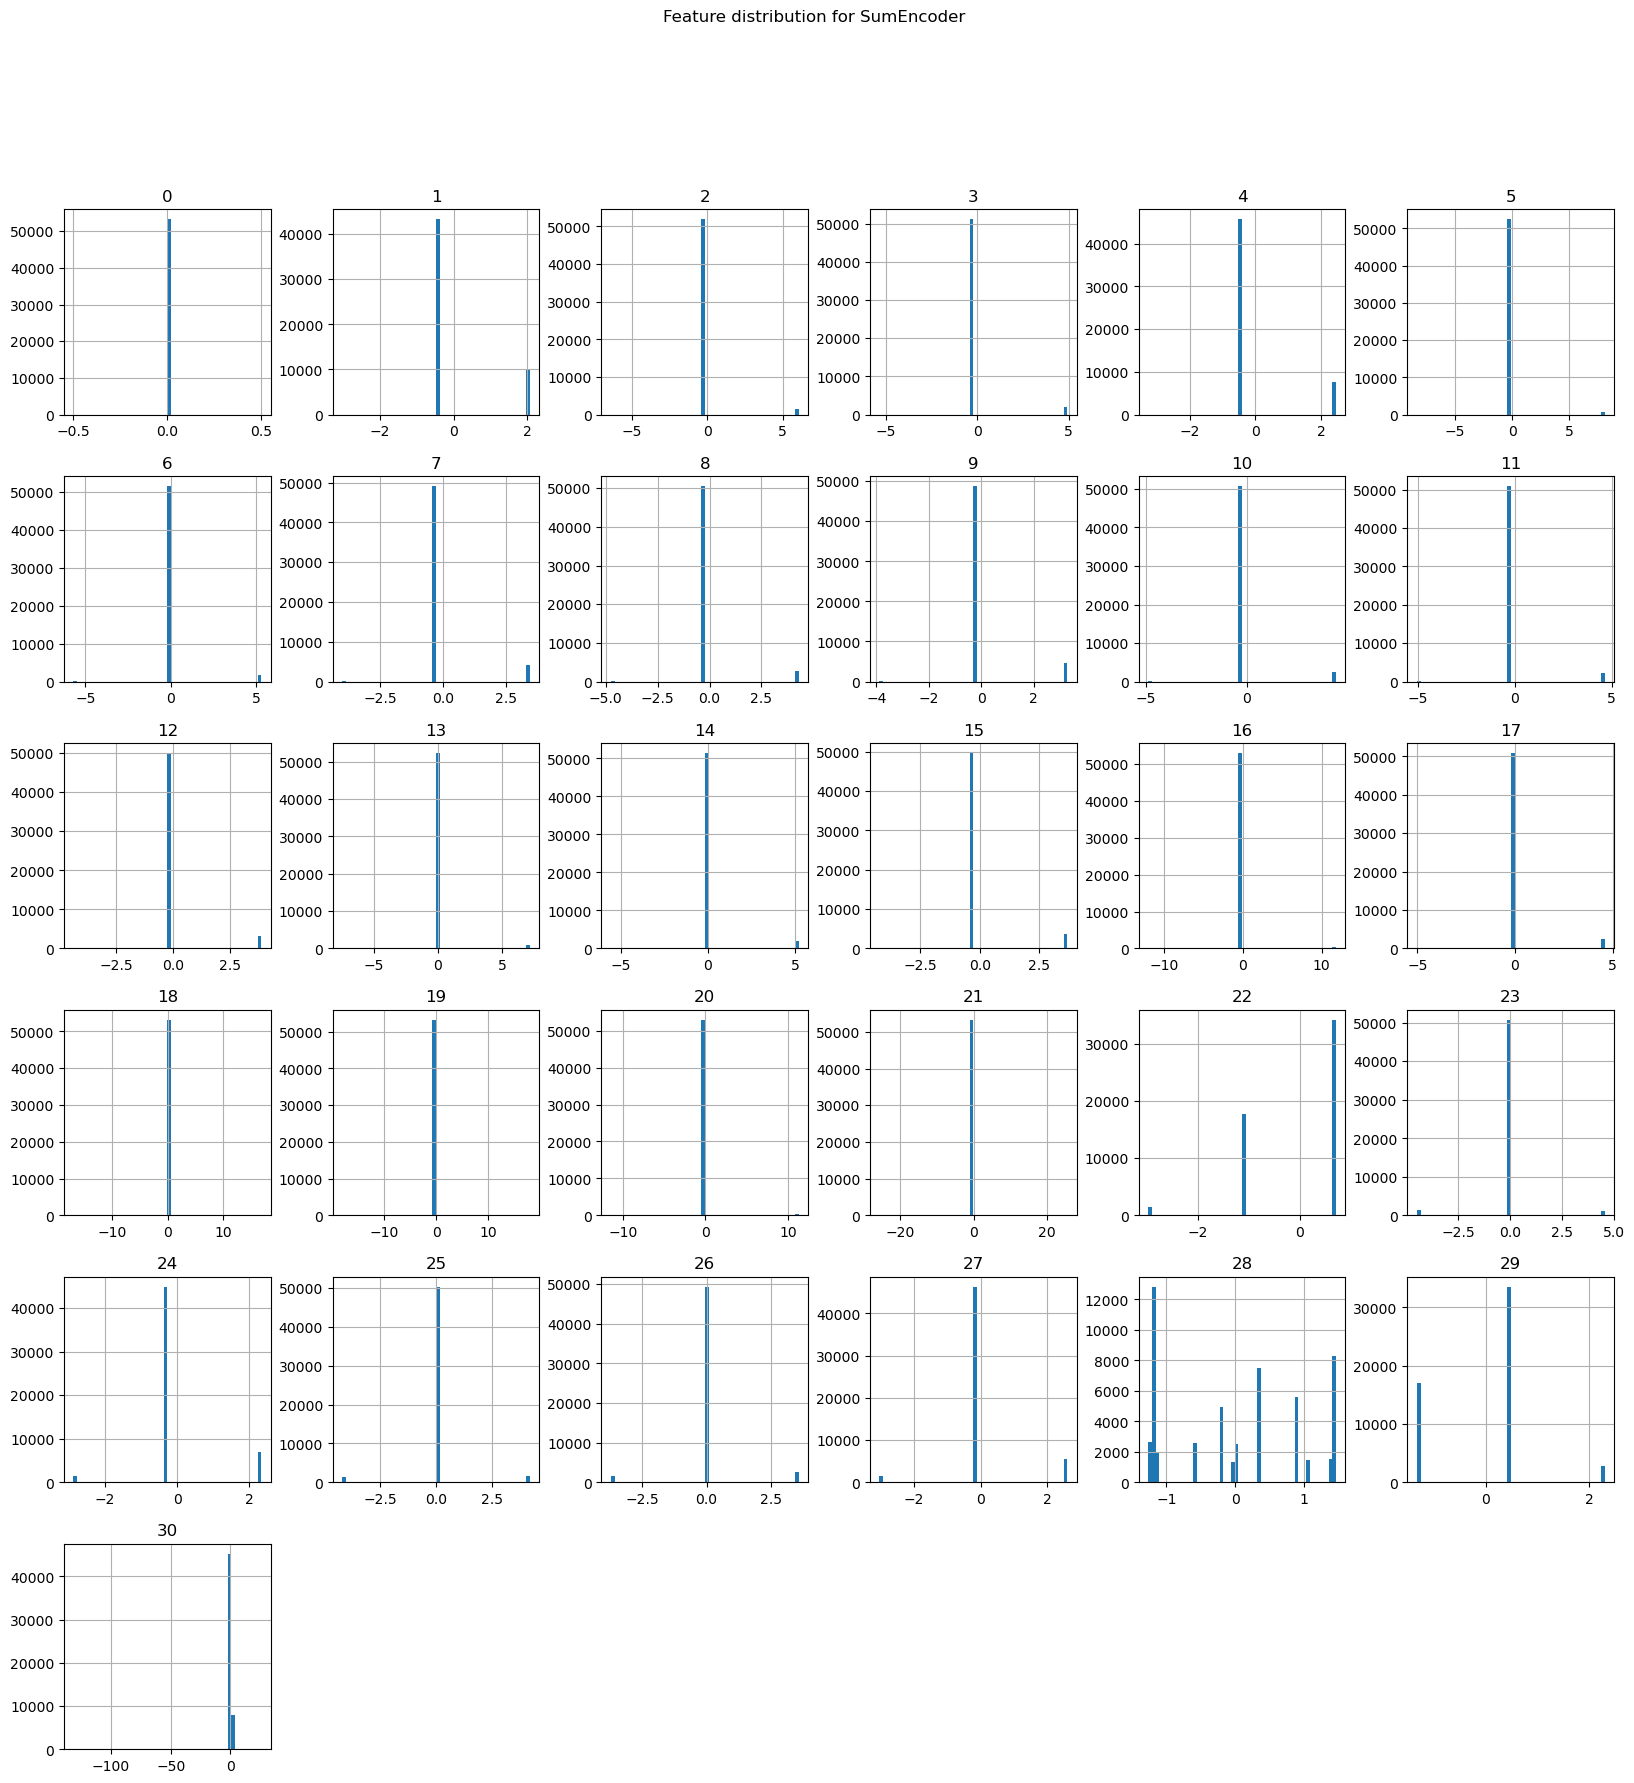

Average MSE for SumEncoder: 1.7218026871696694e-28
Average R2 for SumEncoder: 1.0


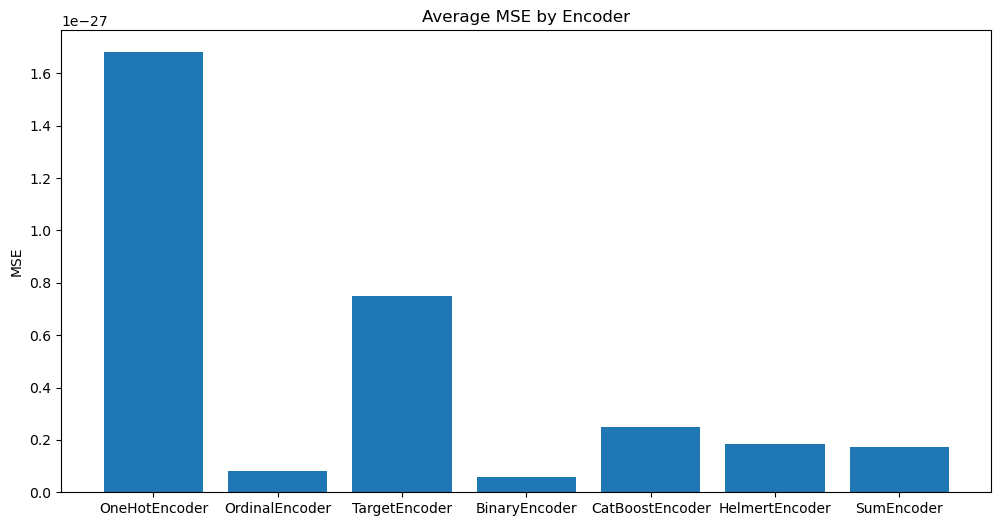

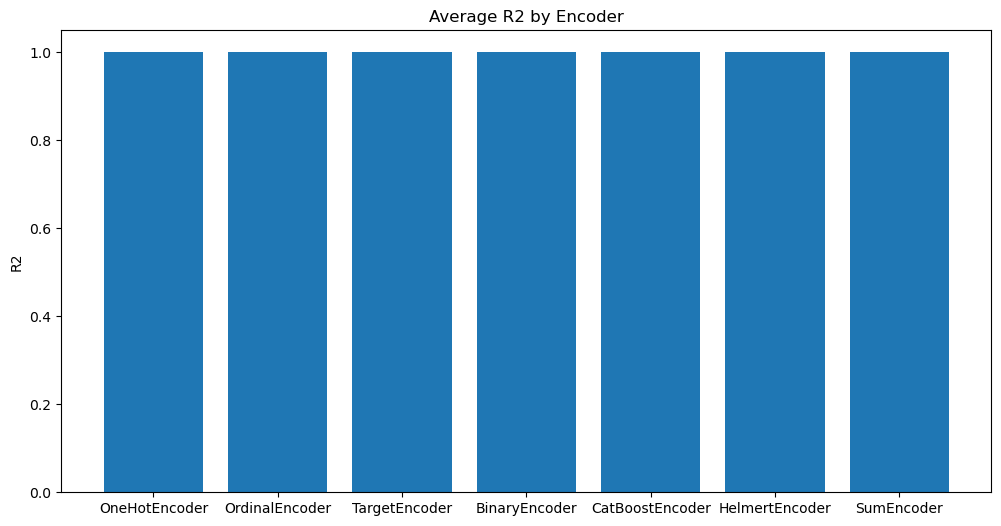

In [32]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Identifying categorical features
categorical_features = ['Site', 'Model']

# Create a copy of your data and drop the 'End DateTime' column
X_base_modified = X_base.drop('End DateTime', axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_base_modified, y_base, test_size=0.2, random_state=12)

# Define your models
encoders = [OneHotEncoder, OrdinalEncoder, TargetEncoder, BinaryEncoder, CatBoostEncoder, HelmertEncoder, SumEncoder]
names = ['OneHotEncoder', 'OrdinalEncoder', 'TargetEncoder', 'BinaryEncoder', 'CatBoostEncoder', 'HelmertEncoder', 'SumEncoder']

mse_results = []
r2_results = []

kf = KFold(n_splits=5)

for encoder, name in zip(encoders, names):
    try:
        # Define a pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', encoder(), categorical_features)],
            remainder='passthrough')

        # This part of your code is initializing a ColumnTransformer. This is an object from the scikit-learn library that 
        # can apply different preprocessing steps to different columns of your input data. In this case, 
        # it's applying an encoder to the categorical features of your dataset.
        # 'cat': This is just a name for this transformer. You could call it anything you like.
        # encoder(): This should be a callable (like a function) that transforms data. The exact transformation will depend on what encoder() is. 
        # It could be, for example, a OneHotEncoder, which would convert each category in the data to a new binary feature.
        # categorical_features: This should be a list of names of categorical columns in the input data that you want to transform.
        # remainder='passthrough': This tells the ColumnTransformer to leave the columns not specified in transformers unchanged.
        # Conditionally add scaler to the pipeline

        if encoder == OneHotEncoder:
            pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', LinearRegression())])
        else:
            pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('scaler', StandardScaler()),
                                   ('regressor', LinearRegression())])
        
        # This part of your code is creating a pipeline. A pipeline in scikit-learn is a way of chaining together multiple steps of a machine learning process. 
        # Each step is a tuple containing a name (a string) and an instance of a transformer or a model.
        # 'preprocessor' and preprocessor: This step will apply the preprocessing defined by preprocessor (in this case, encoding the categorical features).
        # 'scaler' and StandardScaler(): This step will scale the features to have zero mean and unit variance. It's a common step for many machine learning algorithms.
        # 'regressor' and LinearRegression(): This step will apply a linear regression model to the data.
        # The pipeline pipe can then be used like a normal scikit-learn model, with methods like fit() and predict(). 
        # The benefit of using a pipeline is that it ensures the same preprocessing steps are applied in the same order to both the training data and any new data.

        # Fit and transform the training data
        X_train_transformed = preprocessor.fit_transform(X_train, y_train)

        # If necessary, standardize the transformed features
        if encoder != OneHotEncoder:
            scaler = StandardScaler()
            X_train_transformed = scaler.fit_transform(X_train_transformed)

        # Convert the transformed features into a DataFrame
        X_train_transformed = pd.DataFrame(X_train_transformed)

        # Plot histogram
        X_train_transformed.hist(bins=50, figsize = (20,20))
        plt.suptitle(f'Feature distribution for {name}')
        plt.show()

        # K-fold cross-validation
        mse_scores = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mse_results.append(-np.mean(mse_scores))  # Negate because sklearn returns negative mse
        print(f"Average MSE for {name}: {-mse_scores.mean()}")
        
        r2_scores = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2')
        r2_results.append(np.mean(r2_scores))  # No need to negate
        print(f"Average R2 for {name}: {r2_scores.mean()}")
    
    except ValueError as e:
        print(f"Encoder {name} raised an error: {str(e)}")
        continue

# Plotting MSE results
plt.figure(figsize=(12, 6))  # Make the figure larger
plt.bar(names, mse_results)
plt.title('Average MSE by Encoder')
plt.ylabel('MSE')
plt.show()

# Plotting R2 results
plt.figure(figsize=(12, 6))  # Make the figure larger
plt.bar(names, r2_results)
plt.title('Average R2 by Encoder')
plt.ylabel('R2')
plt.show()


In [33]:
# Specify the categorical columns
categorical_columns = ['Site', 'Model']  # Replace with your actual categorical columns

# Create the encoder
encoder = OrdinalEncoder(cols=categorical_columns)

# Fit the encoder and transform the data
train_data_encoded = encoder.fit_transform(X_base)


In [34]:
train_data_encoded

,CP ID,Connector,Total kWh,Site,Model,End DateTime
Start DateTime,,,,,,
2016-01-09 07:21:00,50994,1,2.084000,1,1,2016-01-09 07:27:00
2016-01-09 07:51:00,50281,2,3.870000,2,2,2016-01-09 09:01:00
2016-01-09 08:22:00,50285,1,13.930000,3,2,2016-01-09 14:32:00
2016-01-09 08:54:00,50281,1,10.380000,2,2,2016-01-09 16:37:00
2016-01-09 09:22:00,50745,2,3.580000,4,1,2016-01-09 09:37:00
...,...,...,...,...,...,...
2019-12-08 20:34:00,50838,1,10.758277,21,7,NaT
2019-12-08 20:47:00,51519,2,10.080000,11,1,2019-12-08 21:15:00
2019-12-08 21:01:00,51249,1,4.690000,17,4,2019-12-08 21:17:00


In [35]:
y_base 

Start DateTime
2016-01-09 07:21:00     2.084000
2016-01-09 07:51:00     3.870000
2016-01-09 08:22:00    13.930000
2016-01-09 08:54:00    10.380000
2016-01-09 09:22:00     3.580000
                         ...    
2019-12-08 20:34:00    10.758277
2019-12-08 20:47:00    10.080000
2019-12-08 21:01:00     4.690000
2019-12-08 22:27:00    14.710000
2019-12-08 22:45:00     7.930000
Name: Total kWh, Length: 66664, dtype: float64

In [36]:
def encode_categorical_columns(data, categorical_columns):
    # Create a copy of the original dataframe to keep original data intact
    data_encoded = data.copy()

    # Create an instance of the encoder for each column
    encoders = {col: OrdinalEncoder() for col in categorical_columns}

    # Fit each encoder and transform the data, adding the suffix to new columns
    for col, encoder in encoders.items():
        data_encoded[col + '_encoded'] = encoder.fit_transform(data_encoded[[col]])

    return data_encoded

def append_target_variable(data, y_base):
    # Create a separate dataframe for y_base
    y_base_df = pd.DataFrame(y_base, columns=['Total kWh'])

    # Append y_base to the encoded dataframe
    data = pd.concat([data, y_base_df], axis=1)

    return data

def save_encoded_data(data, save_path, file_name):
    # Save the dataframe
    data.to_csv(os.path.join(save_path, f'{file_name}.csv'), index=True)

def encode_and_save(data, y_base, categorical_columns, save_path, file_name):
    data_encoded = encode_categorical_columns(data, categorical_columns)
    data_encoded = append_target_variable(data_encoded, y_base)
    save_encoded_data(data_encoded, save_path, file_name)

    return data_encoded

# Specify the categorical columns
categorical_columns = ['Site', 'Model']  

# Get the absolute path
cwd = os.getcwd()
DATA_PATH_interim = os.path.join(cwd, '..', 'data', 'interim')

# Use function
train_data_encoded = encode_and_save(X_base, y_base, categorical_columns, DATA_PATH_interim, 'train_data_encoded')


In [37]:
train_data_encoded.head()

,CP ID,Connector,Total kWh,Site,Model,End DateTime,Site_encoded,Model_encoded,Total kWh
Start DateTime,,,,,,,,,
2016-01-09 07:21:00,50994,1,2.084,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,2016-01-09 07:27:00,0.0,3.0,2.084
2016-01-09 07:51:00,50281,2,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 09:01:00,19.0,0.0,3.870
2016-01-09 08:22:00,50285,1,13.930,Broxden Park & Ride,APT 22kW Dual Outlet,2016-01-09 14:32:00,3.0,0.0,13.930
2016-01-09 08:54:00,50281,1,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 16:37:00,19.0,0.0,10.380
2016-01-09 09:22:00,50745,2,3.580,Kinross Park and Ride,APT Triple Rapid Charger,2016-01-09 09:37:00,13.0,3.0,3.580


In [6]:
aaa = pd.read_csv(os.path.join(cwd, '..', 'data', 'interim', 'train_data_encoded.csv'))

In [7]:
aaa.head()

,Start DateTime,CP ID,Connector,Total kWh,Site,Model,End DateTime,Site_encoded,Model_encoded,Total kWh.1
0,2016-01-09 07:21:00,50994,1,2.084,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,2016-01-09 07:27:00,0.0,3.0,2.084
1,2016-01-09 07:51:00,50281,2,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 09:01:00,19.0,0.0,3.870
2,2016-01-09 08:22:00,50285,1,13.930,Broxden Park & Ride,APT 22kW Dual Outlet,2016-01-09 14:32:00,3.0,0.0,13.930
3,2016-01-09 08:54:00,50281,1,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 16:37:00,19.0,0.0,10.380
4,2016-01-09 09:22:00,50745,2,3.580,Kinross Park and Ride,APT Triple Rapid Charger,2016-01-09 09:37:00,13.0,3.0,3.580
